## Analisis Data Supermarket

In [356]:
import pandas as pd
import numpy as np

#data visualisasi 
import matplotlib.pyplot as plt
import seaborn as sns


#statistik 
import statsmodels.api as sm
import scipy.stats as stats

In [357]:
df = pd.read_csv("Supermarket Customers.csv", sep='\t')
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Data Pre-Processing

In [359]:
pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null': df.isna().mean().values * 100,
    'negative': [True if df[col].dtype == int and (df[col] < 0).any() else False for col in df.columns],
    'n_unique': df.nunique().values,
    'min': df.min().values,
    'max': df.max().values,
    'sample_unique': [df[col].unique() for col in df.columns]
})

feature data_type      null  negative  n_unique         min  \
0                    ID     int64  0.000000     False      2240           0   
1            Year_Birth     int64  0.000000     False        59        1893   
2             Education    object  0.000000     False         5    2n Cycle   
3        Marital_Status    object  0.000000     False         8      Absurd   
4                Income   float64  1.071429     False      1974      1730.0   
5               Kidhome     int64  0.000000     False         3           0   
6              Teenhome     int64  0.000000     False         3           0   
7           Dt_Customer    object  0.000000     False       663  01-01-2013   
8               Recency     int64  0.000000     False       100           0   
9              MntWines     int64  0.000000     False       776           0   
10            MntFruits     int64  0.000000     False       158           0   
11      MntMeatProducts     int64  0.000000     False       558           0   
12      MntFishProducts     int64  0.000000     False       182           0   
13     MntSweetProducts     int64  0.000000     False       177           0   
14         MntGoldProds     int64  0.000000     False       213           0   
15    NumDealsPurchases     int64  0.000000     False        15           0   
16      NumWebPurchases     int64  0.000000     False        15           0   
17  NumCatalogPurchases     int64  0.000000     False        14           0   
18    NumStorePurchases     int64  0.000000     False        14           0   
19    NumWebVisitsMonth     int64  0.000000     False        16           0   
20         AcceptedCmp3     int64  0.000000     False         2           0   
21         AcceptedCmp4     int64  0.000000     False         2           0   
22         AcceptedCmp5     int64  0.000000     False         2           0   
23         AcceptedCmp1     int64  0.000000     False         2           0   
24         AcceptedCmp2     int64  0.000000     False         2           0   
25             Complain     int64  0.000000     False         2           0   
26        Z_CostContact     int64  0.000000     False         1           3   
27            Z_Revenue     int64  0.000000     False         1          11   
28             Response     int64  0.000000     False         2           0   

           max                                      sample_unique  
0        11191  [5524, 2174, 4141, 6182, 5324, 7446, 965, 6177...  
1         1996  [1957, 1954, 1965, 1984, 1981, 1967, 1971, 198...  
2          PhD         [Graduation, PhD, Master, Basic, 2n Cycle]  
3         YOLO  [Single, Together, Married, Divorced, Widow, A...  
4     666666.0  [58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ...  
5            2                                          [0, 1, 2]  
6            2                                          [0, 1, 2]  
7   31-12-2013  [04-09-2012, 08-03-2014, 21-08-2013, 10-02-201...  
8           99  [58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8...  
9         1493  [635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6...  
10         199  [88, 1, 49, 4, 43, 42, 65, 10, 0, 5, 16, 61, 2...  
11        1725  [546, 6, 127, 20, 118, 98, 164, 56, 24, 11, 48...  
12         259  [172, 2, 111, 10, 46, 0, 50, 3, 1, 11, 225, 6,...  
13         263  [88, 1, 21, 3, 27, 42, 49, 2, 112, 5, 68, 13, ...  
14         362  [88, 6, 42, 5, 15, 14, 27, 23, 2, 13, 1, 16, 3...  
15          15  [3, 2, 1, 5, 4, 15, 7, 0, 6, 9, 12, 8, 10, 13,...  
16          27  [8, 1, 2, 5, 6, 7, 4, 3, 11, 0, 27, 10, 9, 23,...  
17          28     [10, 1, 2, 0, 3, 4, 6, 28, 9, 5, 8, 7, 11, 22]  
18          13     [4, 2, 10, 6, 7, 0, 3, 8, 5, 12, 9, 13, 11, 1]  
19          20  [7, 5, 4, 6, 8, 9, 20, 2, 3, 1, 10, 0, 14, 19,...  
20           1                                             [0, 1]  
21           1                                             [0, 1]  
22           1                                             [0, 1]  
23           

In [360]:
df.describe().T

count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   

                         50%       75%       max  
ID                    5458.5   8427.75   11191.0  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0

**Duplicated Value** digunakan untuk melihat data yang memiliki kesamaan yang muncul lebih dari sekali dalam sebuah dataset. Duplikasi data ini seharusnya dihapus karena akan membuat bias dan hasil analisis yang kurang akurat.

In [361]:
print(f'Jumlah data yang duplikat {df.duplicated().sum()} baris')
print(f'Jumlah data yang duplikat {df.duplicated().sum() / len(df)*100:.2f}%')

Jumlah data yang duplikat 0 baris
Jumlah data yang duplikat 0.00%


**Missing Value** adalah nilai yang seharusnya ada / terisi, namun data tersebut tidak ada atau kosong dalam sebuah dataset. Data yang kosong ini mungkin terjadi karena kesalahan dalam pengumpulan data, kesalahan input, atau tidak adanya informasi yang relevan. 

In [362]:
#untuk melihat missing value
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**Data Cleaning** 
Data Cleaning adalah suatu proses yang dilakukan untuk pengidentifikasi, memperbaiki, dan mengoreksi kesalahan pada data mentah sehingga data siap untuk digunakan lebih lanjut analisisnya.

In [363]:
#menghapus data yang kosong
#df.dropna(inplace=True)

In [364]:
df['Income'].fillna(df['Income'].mean(), inplace=True)
df

C:\Users\HP\AppData\Local\Temp\ipykernel_23052\999311185.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].mean(), inplace=True)


ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [365]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [366]:
#untuk mengetahui jumlah baris dan kolom
df.shape

(2240, 29)

In [367]:
#mgnmengubah tipe data pada Dt_Customer menjadi "Y,M,D"
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%Y-%m-%d')


In [368]:
#melihat Dt_customer apakah sudah terganti atau belum tipe datanya
df['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


Drop Kolom data yang tidak digunakan, karena terdapat 24 baris pada kolom Income kosong, disini saya hapus karena memiliki 1% saja, sehingga tidak akan berpengaruh ke pada tahap analisisnya

In [369]:
df.drop(columns=['Z_CostContact','Z_Revenue'], inplace=True)


In [370]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
0            0  2012-09-04       58       635  ...                   10   
1            1  2014-03-08       38        11  ...                    1   
2            0  2013-08-21       26       426  ...                    2   
3            0  2014-02-10       26        11  ...                    0   
4            0  2014-01-19       94       173  ...                    3   
...        ...         ...      ...       ...  ...                  ...   
2235         1  2013-06-13       46       709  ...                    3   
2236         1  2014-06-10       56       406  ...                    2   
2237         0  2014-01-25       91       908  ...                    3   
2238         1  2014-01-24        8       428  ...                    5   
2239         1  2012-10-15       40        84  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2235                  4                  5             0             0   
2236                  5                  7             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0                0             0             0         0         1  
1                0             0             0         0         0  
2                0             0             0         0         0  
3                0             0             0         0         0  
4                0             0             0         0         0  
...            ...           ...           ...       ...       ...  
2235             0             0             0         0         0  
2236             0             1             0         0         0  
2237             0             0             0         0         0  
2238             0             0             0         0         0  
2239             0             0             0         0         1  

[2240 rows x 27 columns]

Mendeteksi Outlier

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

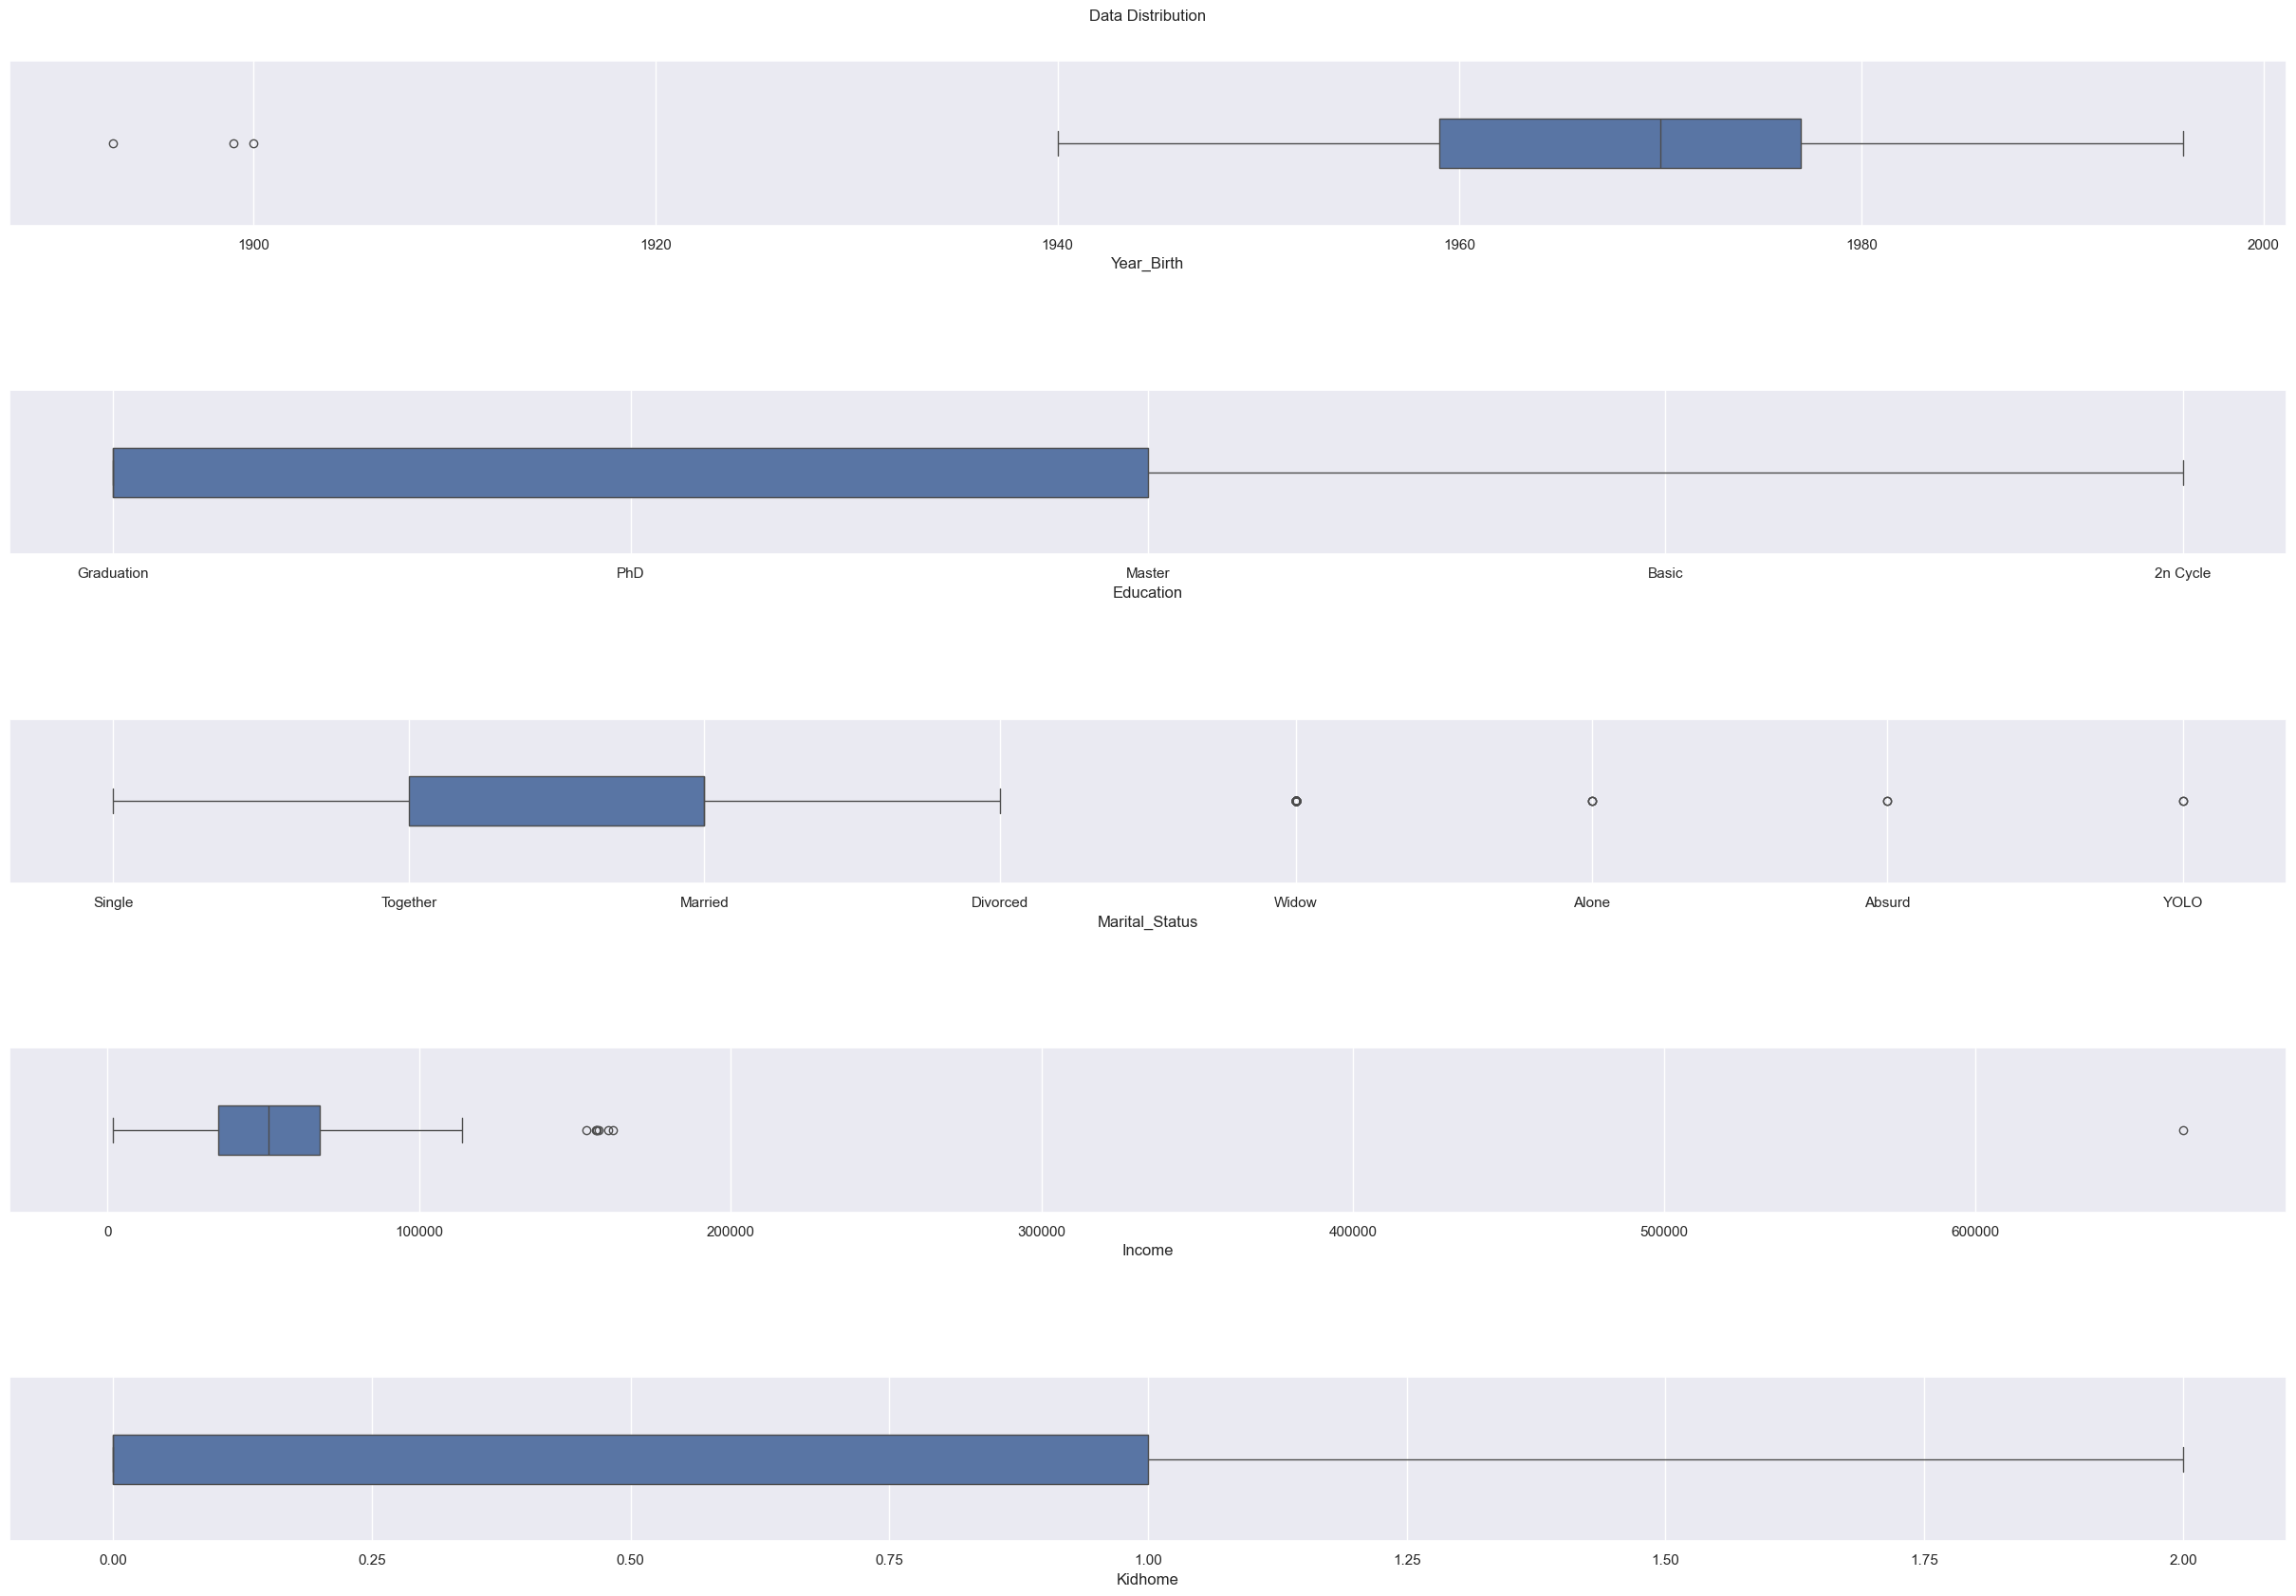

In [372]:
fig, ax = plt.subplots(5, 1, figsize=(30, 20))

sns.boxplot(x='Year_Birth', data=df, width=.3, ax=ax[0])
sns.boxplot(x='Education', data=df, width=.3, ax=ax[1])
sns.boxplot(x='Marital_Status', data=df, width=.3, ax=ax[2])
sns.boxplot(x='Income', data=df, width=.3, ax=ax[3])
sns.boxplot(x='Kidhome', data=df, width=.3, ax=ax[4])


ax[0].set_title("Data Distribution", y=1.2)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, wspace=0.1, hspace=1)
plt.show()


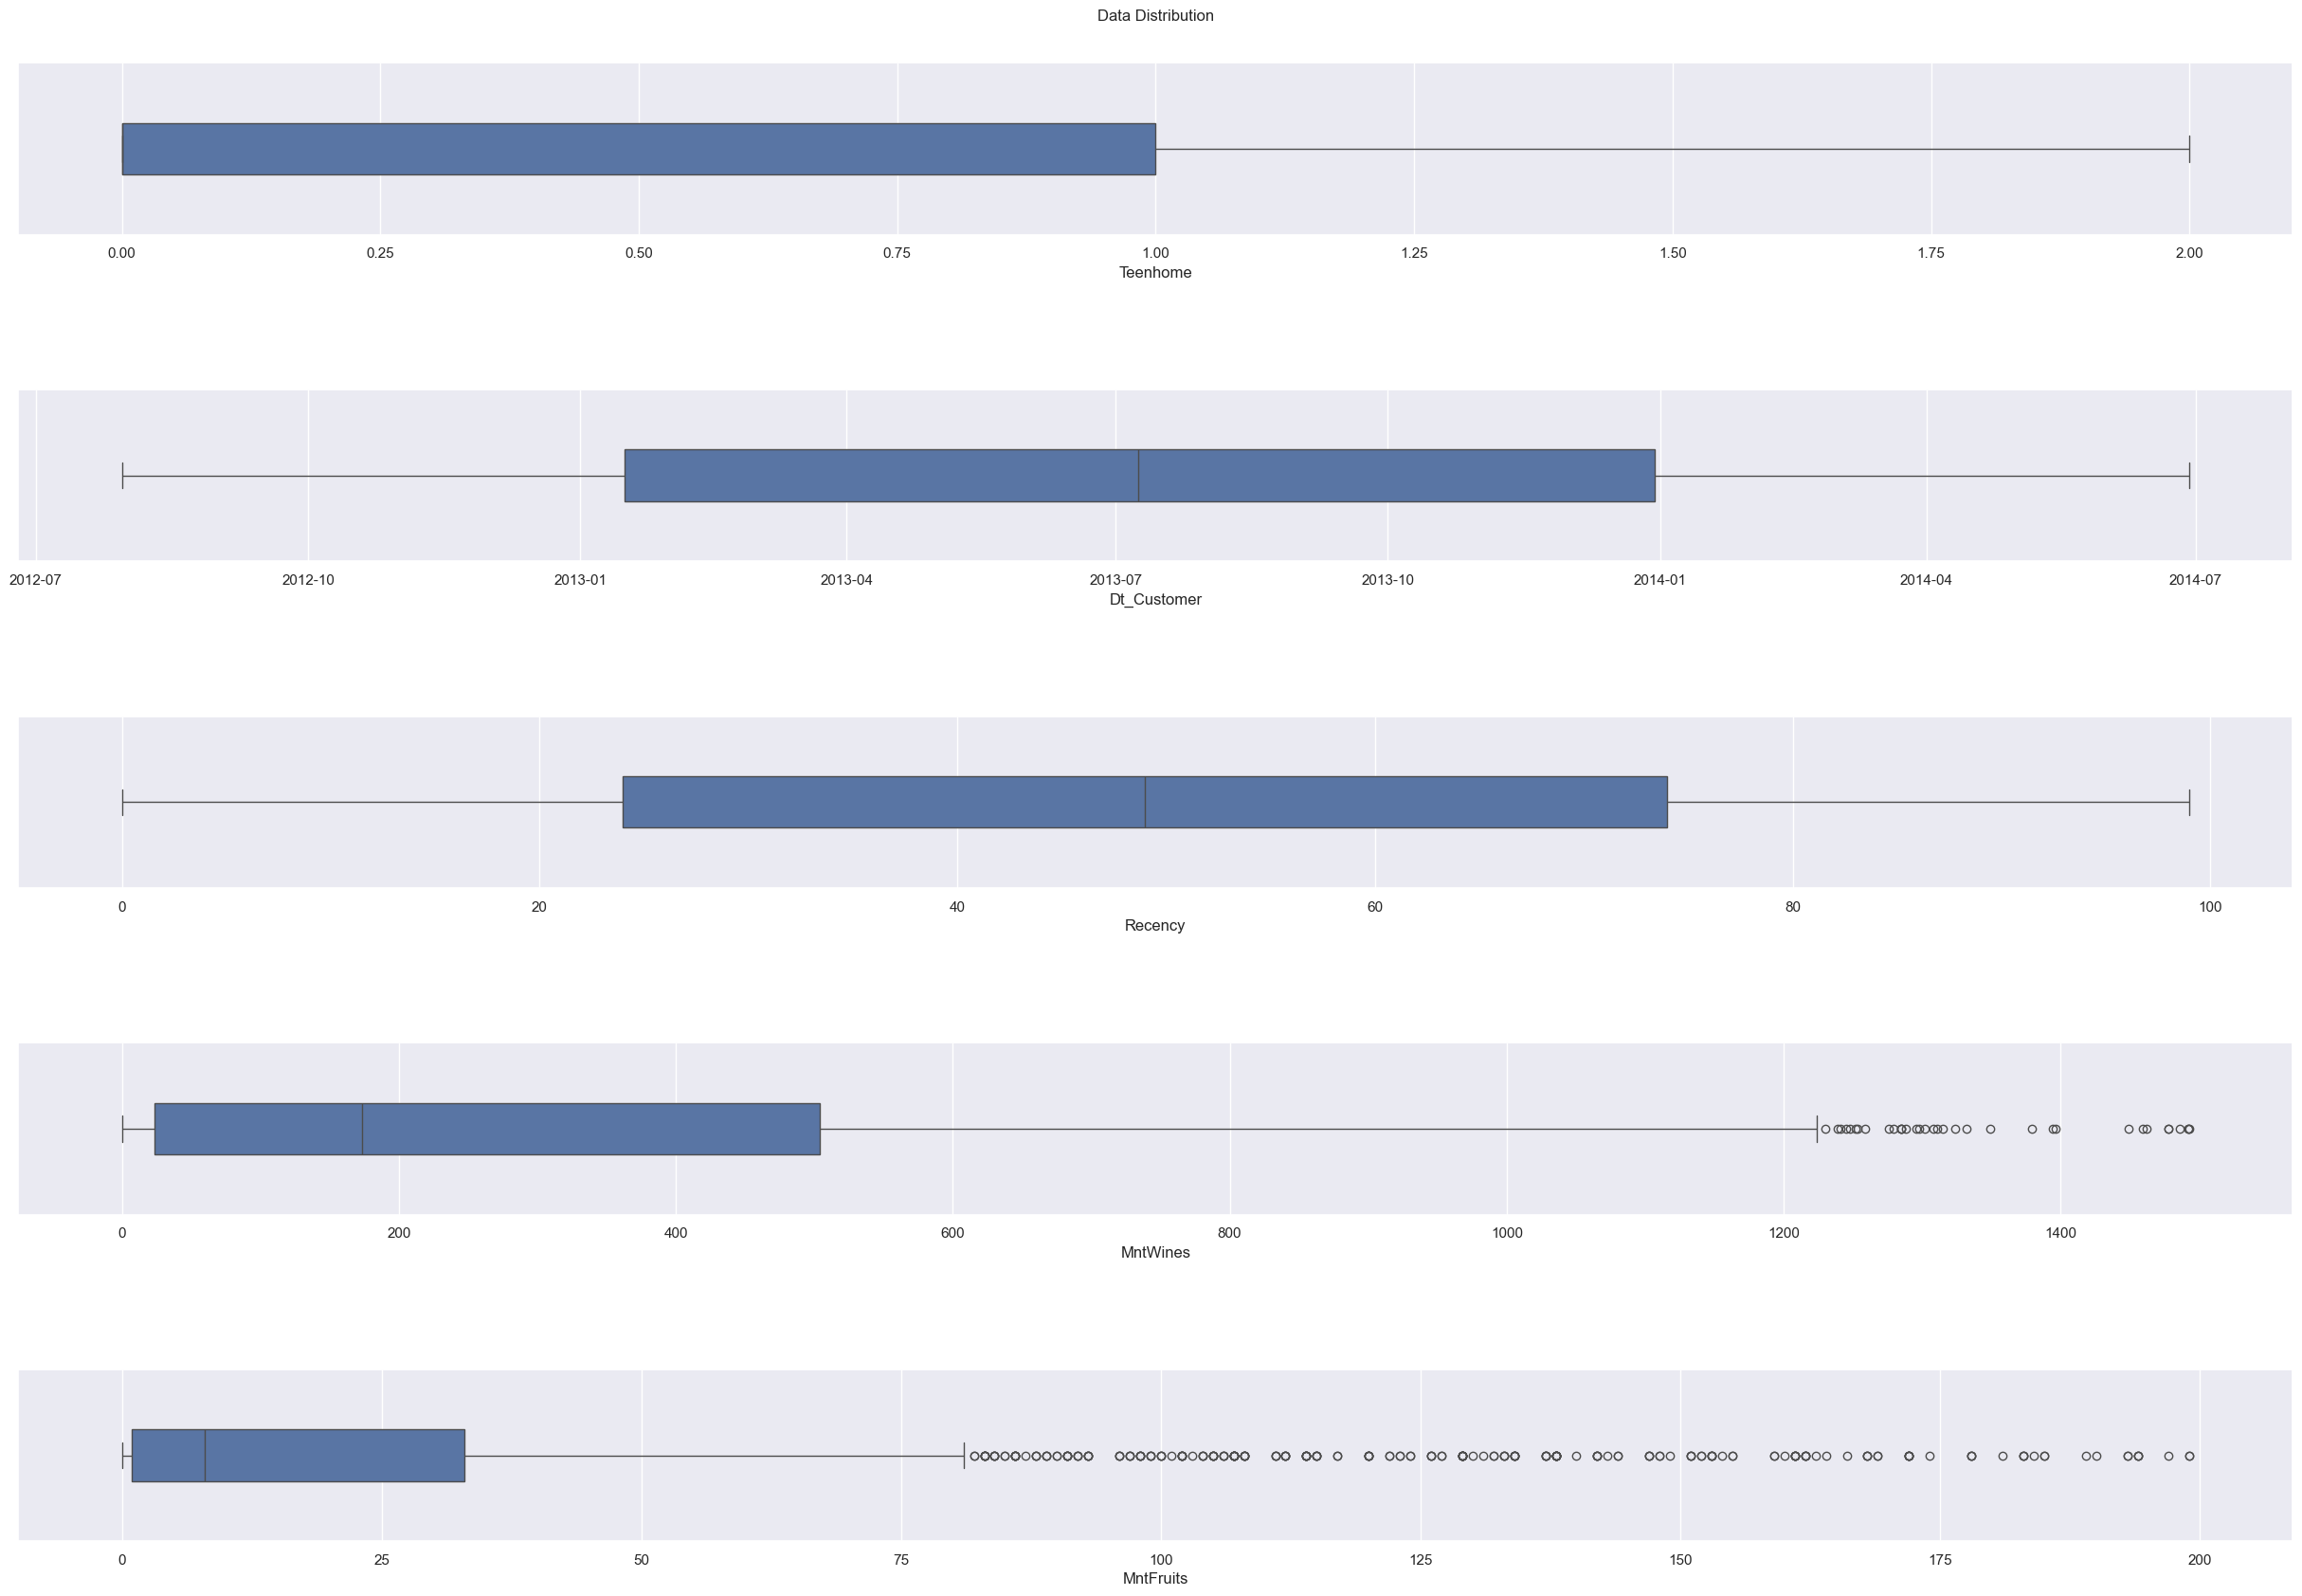

In [373]:
fig, ax = plt.subplots(5, 1, figsize=(30, 20))

sns.boxplot(x='Teenhome', data=df, width=.3, ax=ax[0])
sns.boxplot(x='Dt_Customer', data=df, width=.3, ax=ax[1])
sns.boxplot(x='Recency', data=df, width=.3, ax=ax[2])
sns.boxplot(x='MntWines', data=df, width=.3, ax=ax[3])
sns.boxplot(x='MntFruits', data=df, width=.3, ax=ax[4])


ax[0].set_title("Data Distribution", y=1.2)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, wspace=0.1, hspace=0.9)
plt.show()


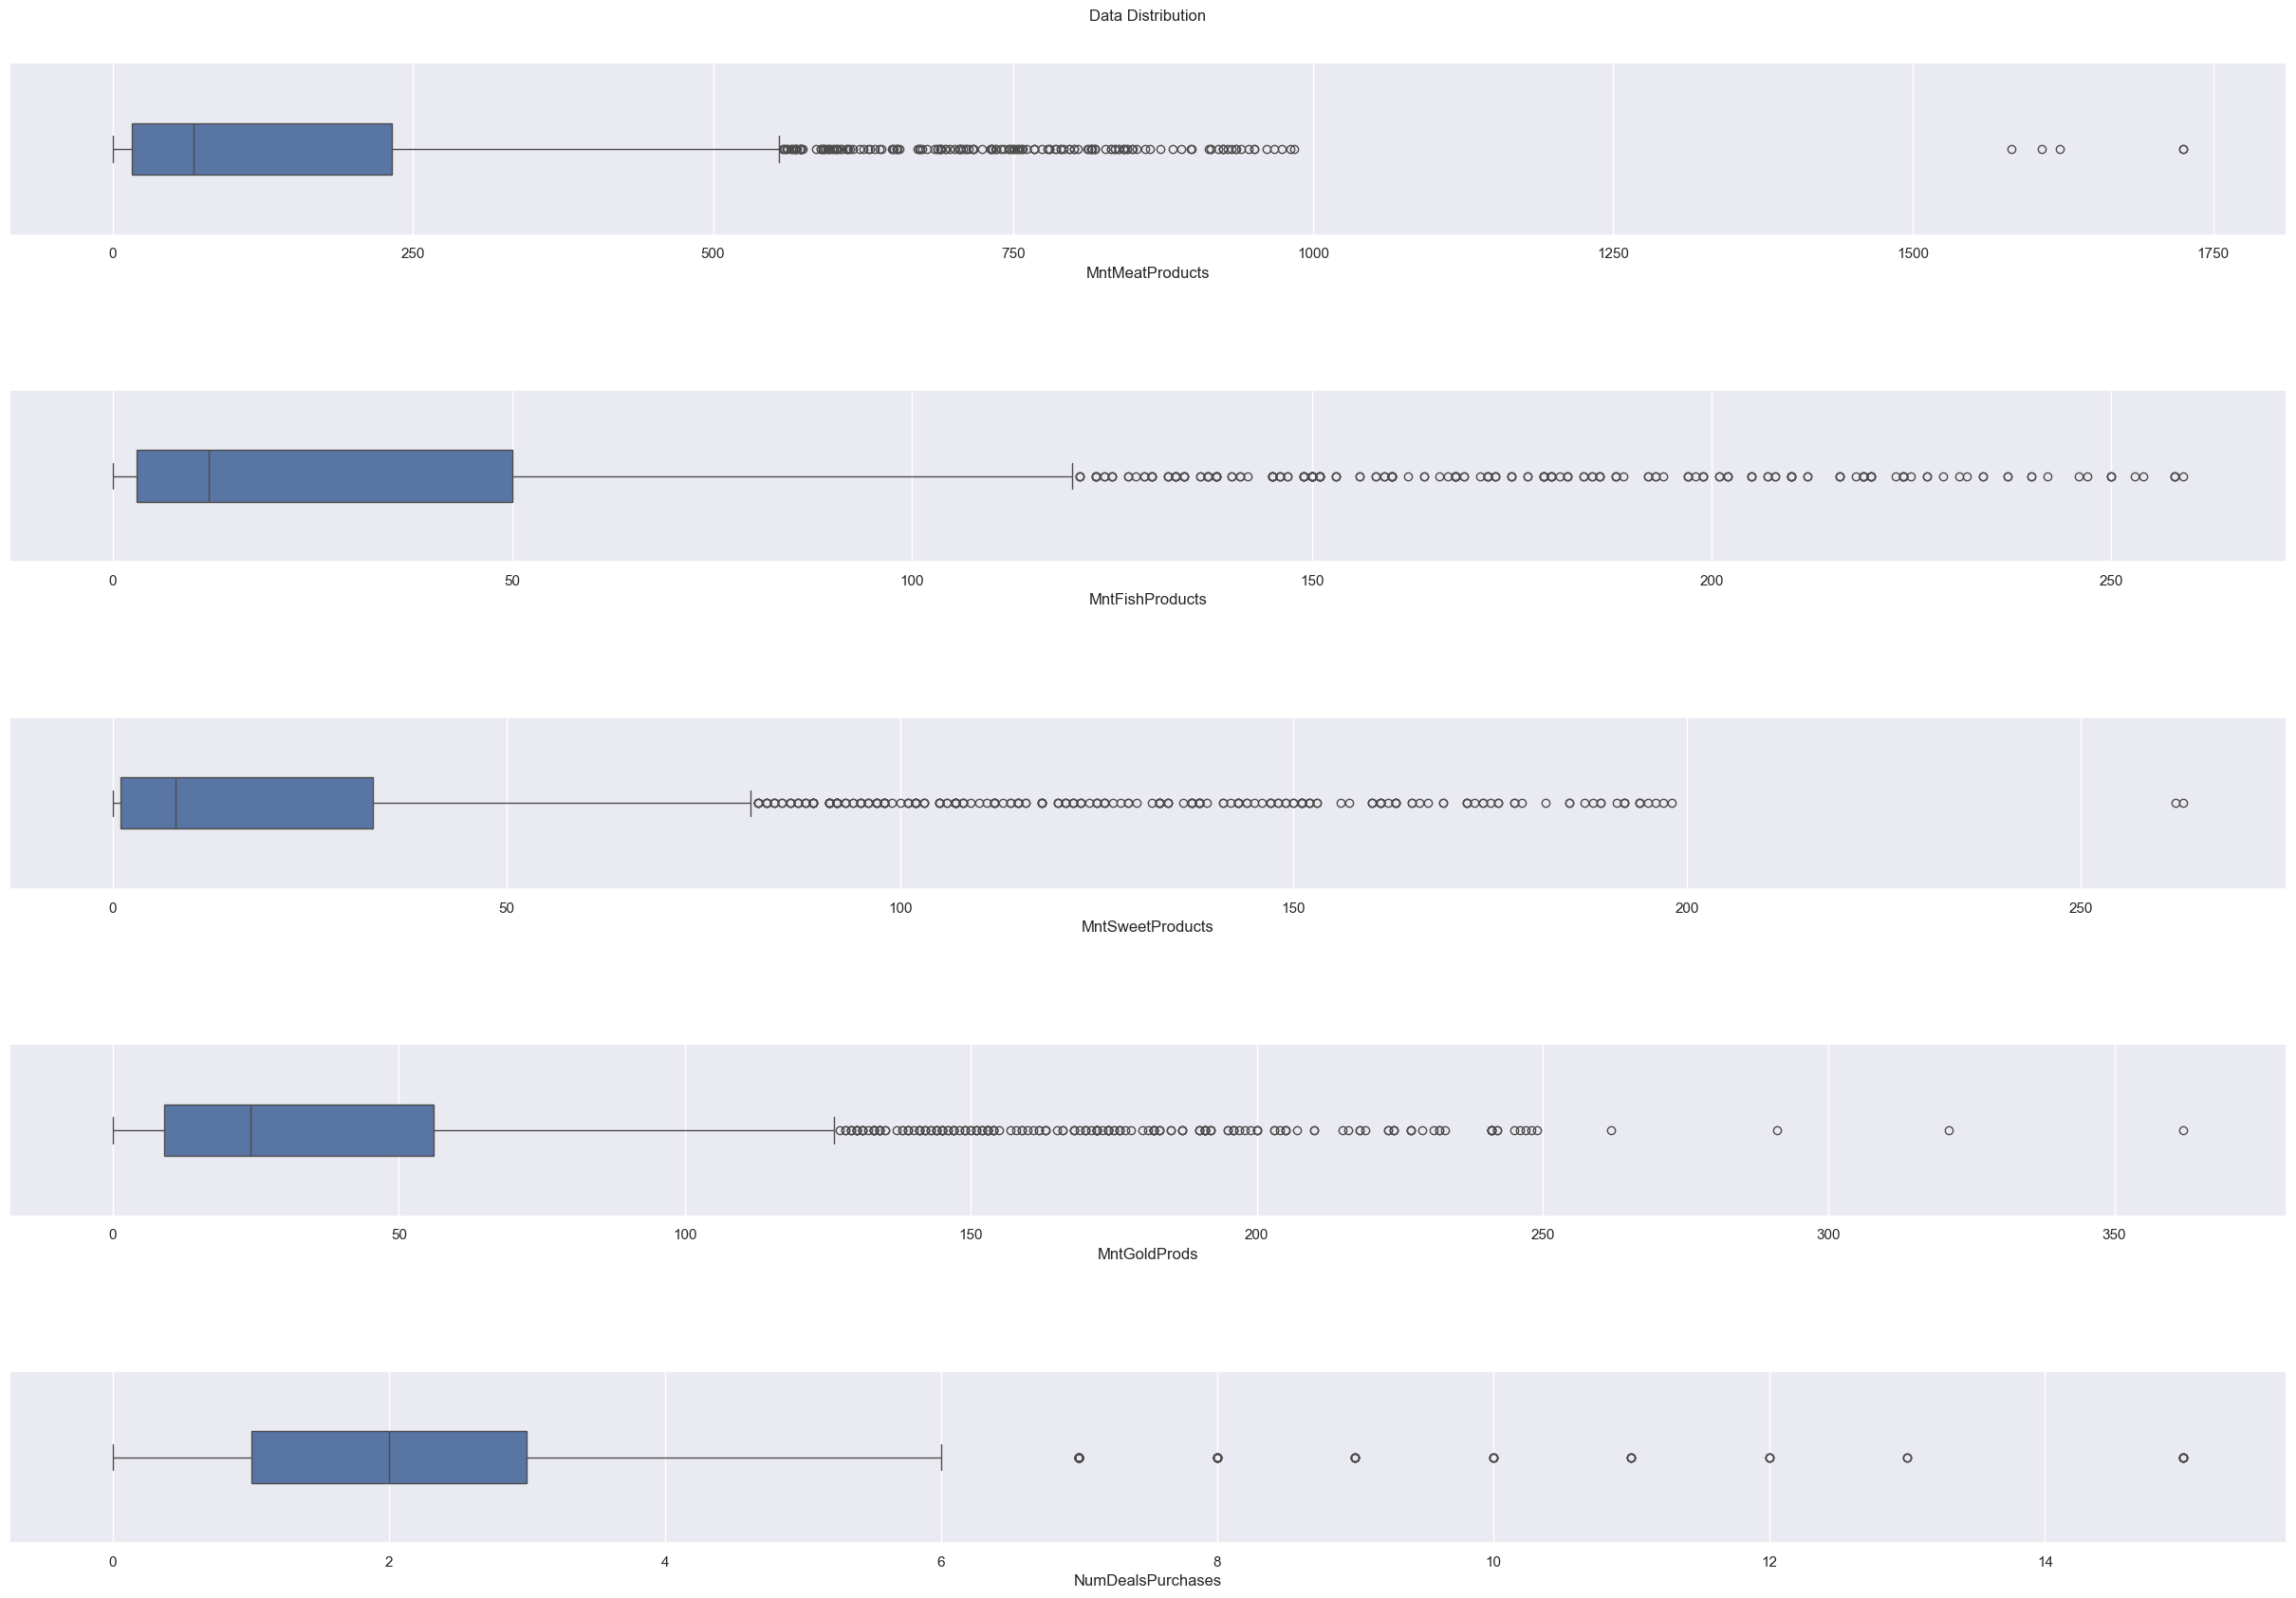

In [374]:
fig, ax = plt.subplots(5, 1, figsize=(30, 20))

sns.boxplot(x='MntMeatProducts', data=df, width=.3, ax=ax[0])
sns.boxplot(x='MntFishProducts', data=df, width=.3, ax=ax[1])
sns.boxplot(x='MntSweetProducts', data=df, width=.3, ax=ax[2])
sns.boxplot(x='MntGoldProds', data=df, width=.3, ax=ax[3])
sns.boxplot(x='NumDealsPurchases', data=df, width=.3, ax=ax[4])


ax[0].set_title("Data Distribution", y=1.2)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, wspace=0.1, hspace=0.9)
plt.show()


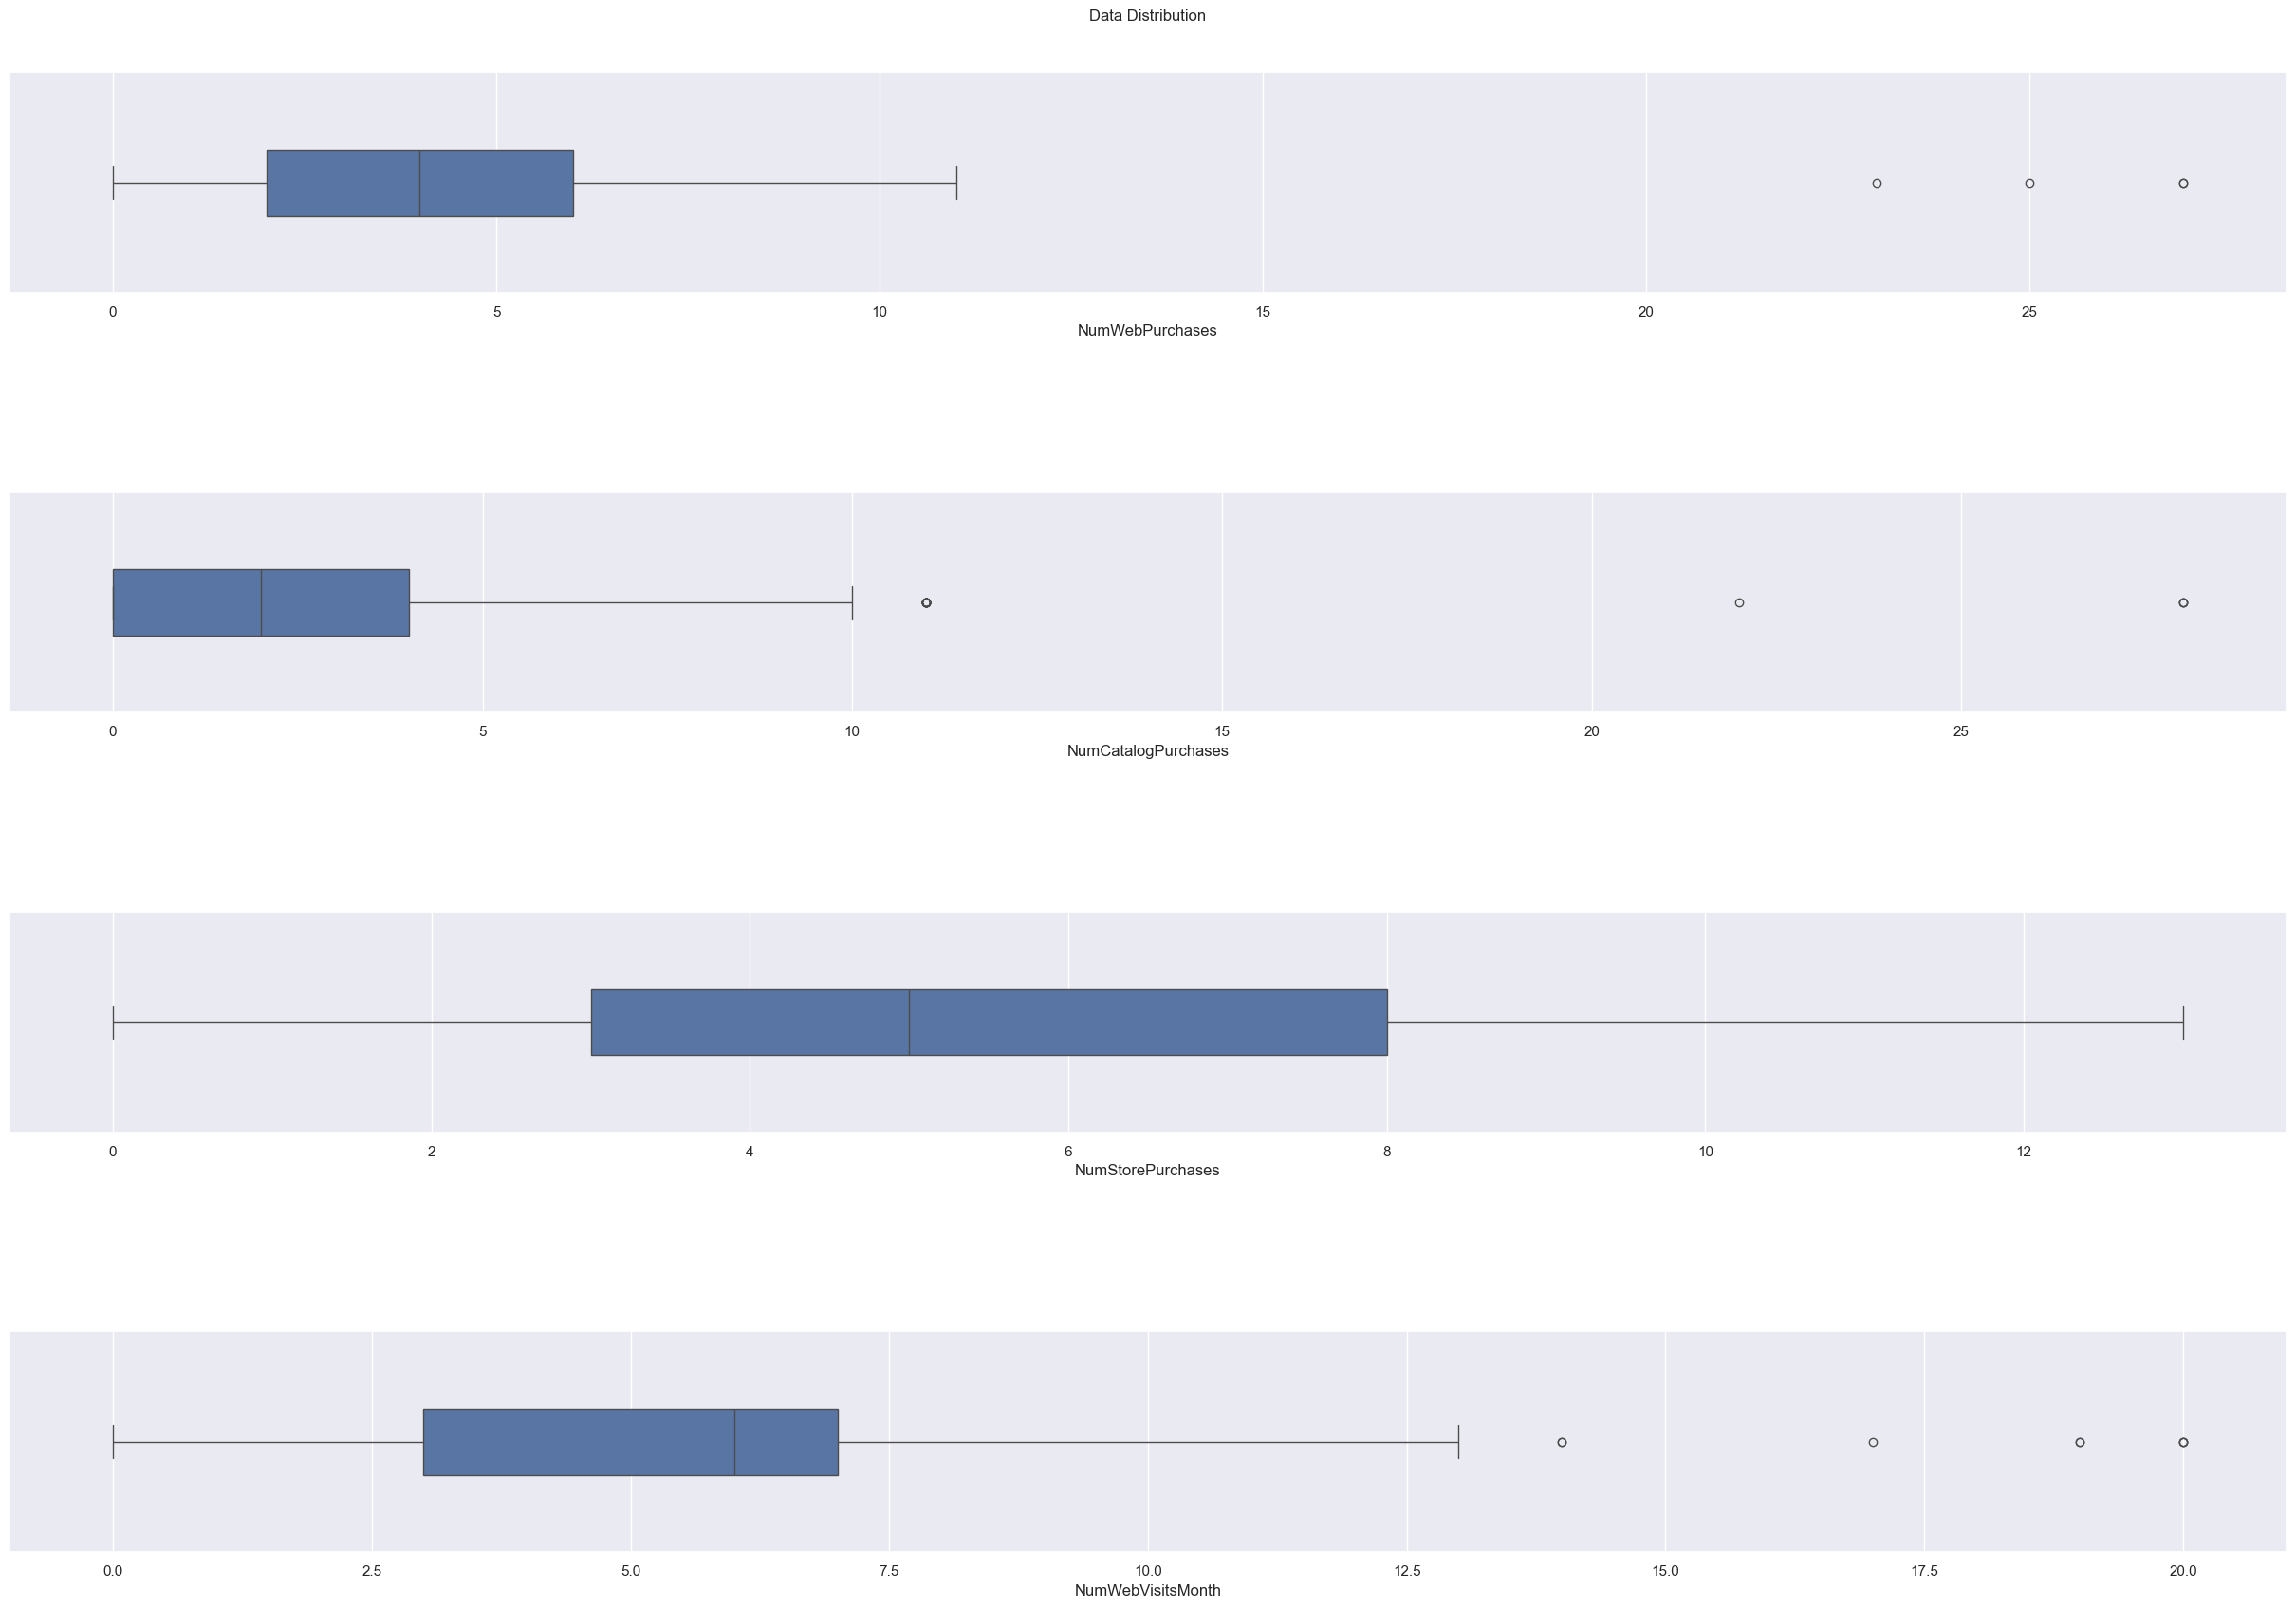

In [375]:
fig, ax = plt.subplots(4, 1, figsize=(30, 20))

sns.boxplot(x='NumWebPurchases', data=df, width=.3, ax=ax[0])
sns.boxplot(x='NumCatalogPurchases', data=df, width=.3, ax=ax[1])
sns.boxplot(x='NumStorePurchases', data=df, width=.3, ax=ax[2])
sns.boxplot(x='NumWebVisitsMonth', data=df, width=.3, ax=ax[3])


ax[0].set_title("Data Distribution", y=1.2)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, wspace=0.1, hspace=0.9)
plt.show()


Hasil Analisis outlier:
- Ada beberapa yang memiliki outlier, namun saya tidak akan menghapus semua yg memiliki outlier. 
- Disini saya akan menghapus outlier pada year_birth, karena dari umur itu jarang sekali yang sampai > 85 tahun. Sehingga disini saya akan menghapus outlier yg umurnya kurang dari 1940. Dalam dataset ini terdapat pelanggan yg lahir di umur tahun 1900. 


In [376]:
age_delete=df['Year_Birth']<1940
df[age_delete]

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192   7829        1900  2n Cycle       Divorced  36640.0        1         0   
239  11004        1893  2n Cycle         Single  60182.0        0         1   
339   1150        1899       PhD       Together  83532.0        0         0   

    Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
192  2013-09-26       99        15  ...                    1   
239  2014-05-17       23         8  ...                    0   
339  2013-09-26       36       755  ...                    6   

     NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
192                  2                  5             0             0   
239                  2                  4             0             0   
339                  4                  1             0             0   

     AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
192             0             0             0         1         0  
239             0             0             0         0         0  
339             1             0             0         0         0  

[3 rows x 27 columns]

In [377]:
#menghapus outlier pada year_birthdf
delete_outlier = df[age_delete]
df.drop(delete_outlier.index, inplace=True)

In [378]:
df.shape

(2237, 27)

<Axes: xlabel='Year_Birth'>

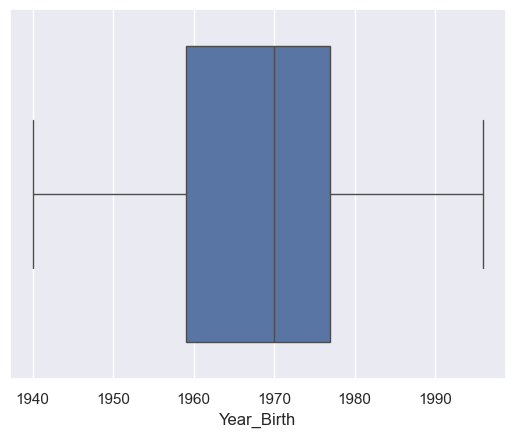

In [379]:
sns.boxplot(x='Year_Birth',data=df)


- Dapat dilihat diatas dalam year_birth sudah tidak ada lagi outlier

In [380]:
df.describe().T

count                           mean  \
ID                   2237.0                    5590.726419   
Year_Birth           2237.0                    1968.901654   
Income               2237.0                   52236.696036   
Kidhome              2237.0                       0.444345   
Teenhome             2237.0                       0.506482   
Dt_Customer            2237  2013-07-10 05:01:54.260169728   
Recency              2237.0                      49.104604   
MntWines             2237.0                      303.99553   
MntFruits            2237.0                      26.270451   
MntMeatProducts      2237.0                     166.916853   
MntFishProducts      2237.0                      37.523022   
MntSweetProducts     2237.0                      27.068842   
MntGoldProds         2237.0                      43.968708   
NumDealsPurchases    2237.0                       2.326777   
NumWebPurchases      2237.0                        4.08717   
NumCatalogPurchases  2237.0                       2.662494   
NumStorePurchases    2237.0                       5.794367   
NumWebVisitsMonth    2237.0                       5.319177   
AcceptedCmp3         2237.0                       0.072865   
AcceptedCmp4         2237.0                       0.074654   
AcceptedCmp5         2237.0                       0.072418   
AcceptedCmp1         2237.0                       0.064372   
AcceptedCmp2         2237.0                       0.013411   
Complain             2237.0                       0.008941   
Response             2237.0                       0.149307   

                                     min                  25%  \
ID                                   0.0               2829.0   
Year_Birth                        1940.0               1959.0   
Income                            1730.0              35523.0   
Kidhome                              0.0                  0.0   
Teenhome                             0.0                  0.0   
Dt_Customer          2012-07-30 00:00:00  2013-01-16 00:00:00   
Recency                              0.0                 24.0   
MntWines                             0.0                 24.0   
MntFruits                            0.0                  1.0   
MntMeatProducts                      0.0                 16.0   
MntFishProducts                      0.0                  3.0   
MntSweetProducts                     0.0                  1.0   
MntGoldProds                         0.0                  9.0   
NumDealsPurchases                    0.0                  1.0   
NumWebPurchases                      0.0                  2.0   
NumCatalogPurchases                  0.0                  0.0   
NumStorePurchases                    0.0                  3.0   
NumWebVisitsMonth                    0.0                  3.0   
AcceptedCmp3                         0.0                  0.0   
AcceptedCmp4                         0.0                  0.0   
AcceptedCmp5                         0.0                  0.0   
AcceptedCmp1                         0.0                  0.0   
AcceptedCmp2                         0.0                  0.0   
Complain                             0.0                  0.0   
Response                             0.0                  0.0   

                                     50%                  75%  \
ID                                5455.0               8427.0   
Year_Birth                        1970.0               1977.0   
Income                           51717.0              68281.0   
Kidhome                              0.0                  1.0   
Teenhome                             0.0                  1.0   
Dt_Customer          2013-07-08 00:00:00  2013-12-30 00:00:00   
Recency                             49.0                 74.0   
MntWines                           174.0                504.0   
MntFruits                            8.0                 33.0   
MntMeatProducts                     67.0                232.0   
Mnt

Umur Customer
- Data diambil di tahun 2015, saya asumsikan data diambil di awal tahun. Karena terakhir data pada Desember 2014
- Untuk tahu umur dari customer 2015 dikurangi tahun lahir customer

In [381]:

df['Age'] = 2015 - df['Year_Birth']
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0            0  2012-09-04       58       635  ...                  4   
1            1  2014-03-08       38        11  ...                  2   
2            0  2013-08-21       26       426  ...                 10   
3            0  2014-02-10       26        11  ...                  4   
4            0  2014-01-19       94       173  ...                  6   
...        ...         ...      ...       ...  ...                ...   
2235         1  2013-06-13       46       709  ...                  4   
2236         1  2014-06-10       56       406  ...                  5   
2237         0  2014-01-25       91       908  ...                 13   
2238         1  2014-01-24        8       428  ...                 10   
2239         1  2012-10-15       40        84  ...                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0             0             0   
2236                  7             0             0             0   
2237                  6             0             1             0   
2238                  3             0             0             0   
2239                  7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  
0                0             0         0         1   58  
1                0             0         0         0   61  
2                0             0         0         0   50  
3                0             0         0         0   31  
4                0             0         0         0   34  
...            ...           ...       ...       ...  ...  
2235             0             0         0         0   48  
2236             1             0         0         0   69  
2237             0             0         0         0   34  
2238             0             0         0         0   59  
2239             0             0         0         1   61  

[2237 rows x 28 columns]

In [382]:
df['age_delete'] = df['Age'] > 100
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04       58       635  ...                  7   
1            1  2014-03-08       38        11  ...                  5   
2            0  2013-08-21       26       426  ...                  4   
3            0  2014-02-10       26        11  ...                  6   
4            0  2014-01-19       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-06-10       56       406  ...                  7   
2237         0  2014-01-25       91       908  ...                  6   
2238         1  2014-01-24        8       428  ...                  3   
2239         1  2012-10-15       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Response  Age  age_delete  
0            0         1   58       False  
1            0         0   61       False  
2            0         0   50       False  
3            0         0   31       False  
4            0         0   34       False  
...        ...       ...  ...         ...  
2235         0         0   48       False  
2236         0         0   69       False  
2237         0         0   34       False  
2238         0         0   59       False  
2239         0         1   61       False  

[2237 rows x 29 columns]

Disini sini saya membuat kelas umur customer dengan mengelompokan menjadi 4 yaitu :
- 13-19 tahun : Teen
- 20 - 39 : Adult
- 30 - 59 : Middle Age Adult
- lebih dari 60 : Senior Adult 

In [383]:
def age_class(x):
    if (x >= 13) & (x <= 19):
        return 'Teen'
    elif (x >= 20) & (x <= 39):
        return 'Adult'
    elif (x >= 40) & (x<= 59):
        return 'Middle Age Adult'
    else:
        return 'Senior Adult'
df['AgeClass'] = df['Age'].apply(age_class)
df.sample(5, random_state=42)

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
1755  5394        1979     Basic         Single  16014.0        1         1   
370   5680        1984  2n Cycle        Married  35684.0        1         0   
1250  9606        1965       PhD        Married  69969.0        0         0   
852   4856        1957  2n Cycle        Married  82347.0        0         0   
1750  3571        1961       PhD       Together  63342.0        0         1   

     Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
1755  2013-03-17       42         3  ...             0             0   
370   2014-04-22       66        10  ...             0             0   
1250  2013-08-27       64       882  ...             0             0   
852   2012-11-06       38       556  ...             1             0   
1750  2012-10-16       48       918  ...             0             1   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
1755             0             0             0         0         0   36   
370              0             0             0         0         0   31   
1250             1             1             0         0         1   50   
852              0             1             0         0         0   58   
1750             0             0             0         0         1   54   

      age_delete          AgeClass  
1755       False             Adult  
370        False             Adult  
1250       False  Middle Age Adult  
852        False  Middle Age Adult  
1750       False  Middle Age Adult  

[5 rows x 30 columns]

In [481]:
df['AgeClass'].value_counts()

AgeClass
Middle Age Adult    1177
Adult                693
Senior Adult         365
Teen                   2
Name: count, dtype: int64

Pada edukasi / tingkat sekolah, disini saya mengelompokan  yaitu:
- Graduation :Graduate, 
- PhD : Graduate, 
- Master' : Graduate, 
- Basic: Undergraduate, 
- 2n Cycle': Undergraduate

In [384]:
df['Education_Cust'] =df['Education'].replace({'Graduation' : 'Graduate', 
                                               'PhD' : 'Graduate', 
                                               'Master' : 'Graduate', 
                                               'Basic': 'Undergraduate', 
                                               '2n Cycle': 'Undergraduate'})
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  \
0            0  2012-09-04       58       635  ...             0   
1            1  2014-03-08       38        11  ...             0   
2            0  2013-08-21       26       426  ...             0   
3            0  2014-02-10       26        11  ...             0   
4            0  2014-01-19       94       173  ...             0   
...        ...         ...      ...       ...  ...           ...   
2235         1  2013-06-13       46       709  ...             0   
2236         1  2014-06-10       56       406  ...             0   
2237         0  2014-01-25       91       908  ...             1   
2238         1  2014-01-24        8       428  ...             0   
2239         1  2012-10-15       40        84  ...             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
0                0             0             0         0         1   58   
1                0             0             0         0         0   61   
2                0             0             0         0         0   50   
3                0             0             0         0         0   31   
4                0             0             0         0         0   34   
...            ...           ...           ...       ...       ...  ...   
2235             0             0             0         0         0   48   
2236             0             1             0         0         0   69   
2237             0             0             0         0         0   34   
2238             0             0             0         0         0   59   
2239             0             0             0         0         1   61   

      age_delete          AgeClass  Education_Cust  
0          False  Middle Age Adult        Graduate  
1          False      Senior Adult        Graduate  
2          False  Middle Age Adult        Graduate  
3          False             Adult        Graduate  
4          False             Adult        Graduate  
...          ...               ...             ...  
2235       False  Middle Age Adult        Graduate  
2236       False      Senior Adult        Graduate  
2237       False             Adult        Graduate  
2238       False  Middle Age Adult        Graduate  
2239       False      Senior Adult        Graduate  

[2237 rows x 31 columns]

Marital Status
Dalam marital status / status perinkahan untuk memudahkan disini saya mengelompokan menjadi berikut:
- Single : Single,
- Together : Relationship,
- Married : 'Relationship',
- Divorced : Single,
- Widow : Relationship,
- Alone : Single, 
- Absurd : Single,
- YOLO : Single

Disini untuk yang sudah menikah / tinggal bareng saya mengelompokan menjadi relationship, untuk yg divorced atau yang tinggal sendiri saya mengelompokan menjadi Single

In [385]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [386]:
df['Marital_Status'] = df['Marital_Status'].replace({'Single' : 'Single',
                                                        'Together' : 'Relationship',
                                                        'Married' : 'Relationship',
                                                        'Divorced' : 'Single',
                                                        'Widow' : 'Relationship',
                                                        'Alone' : 'Single', 
                                                        'Absurd' : 'Single',
                                                        'YOLO' : 'Single'})
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation   Relationship  71613.0        0   
3      6182        1984  Graduation   Relationship  26646.0        1   
4      5324        1981         PhD   Relationship  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation   Relationship  61223.0        0   
2236   4001        1946         PhD   Relationship  64014.0        2   
2237   7270        1981  Graduation         Single  56981.0        0   
2238   8235        1956      Master   Relationship  69245.0        0   
2239   9405        1954         PhD   Relationship  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  \
0            0  2012-09-04       58       635  ...             0   
1            1  2014-03-08       38        11  ...             0   
2            0  2013-08-21       26       426  ...             0   
3            0  2014-02-10       26        11  ...             0   
4            0  2014-01-19       94       173  ...             0   
...        ...         ...      ...       ...  ...           ...   
2235         1  2013-06-13       46       709  ...             0   
2236         1  2014-06-10       56       406  ...             0   
2237         0  2014-01-25       91       908  ...             1   
2238         1  2014-01-24        8       428  ...             0   
2239         1  2012-10-15       40        84  ...             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
0                0             0             0         0         1   58   
1                0             0             0         0         0   61   
2                0             0             0         0         0   50   
3                0             0             0         0         0   31   
4                0             0             0         0         0   34   
...            ...           ...           ...       ...       ...  ...   
2235             0             0             0         0         0   48   
2236             0             1             0         0         0   69   
2237             0             0             0         0         0   34   
2238             0             0             0         0         0   59   
2239             0             0             0         0         1   61   

      age_delete          AgeClass  Education_Cust  
0          False  Middle Age Adult        Graduate  
1          False      Senior Adult        Graduate  
2          False  Middle Age Adult        Graduate  
3          False             Adult        Graduate  
4          False             Adult        Graduate  
...          ...               ...             ...  
2235       False  Middle Age Adult        Graduate  
2236       False      Senior Adult        Graduate  
2237       False             Adult        Graduate  
2238       False  Middle Age Adult        Graduate  
2239       False      Senior Adult        Graduate  

[2237 rows x 31 columns]

In [387]:
df['Marital_Status'].unique()

array(['Single', 'Relationship'], dtype=object)

Anak
Disini saya menjumlahkan jumlah anak kecil dan jumlah anak remaja dalam satu rumah

In [388]:
df[['Kidhome', 'Teenhome']]

Kidhome  Teenhome
0           0         0
1           1         1
2           0         0
3           1         0
4           1         0
...       ...       ...
2235        0         1
2236        2         1
2237        0         0
2238        0         1
2239        1         1

[2237 rows x 2 columns]

In [389]:
#menambhakan jumlah anak-anak dan jumlah anak remaja
df['Childreen'] = df['Kidhome'] + df['Teenhome']
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation   Relationship  71613.0        0   
3      6182        1984  Graduation   Relationship  26646.0        1   
4      5324        1981         PhD   Relationship  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation   Relationship  61223.0        0   
2236   4001        1946         PhD   Relationship  64014.0        2   
2237   7270        1981  Graduation         Single  56981.0        0   
2238   8235        1956      Master   Relationship  69245.0        0   
2239   9405        1954         PhD   Relationship  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  \
0            0  2012-09-04       58       635  ...             0   
1            1  2014-03-08       38        11  ...             0   
2            0  2013-08-21       26       426  ...             0   
3            0  2014-02-10       26        11  ...             0   
4            0  2014-01-19       94       173  ...             0   
...        ...         ...      ...       ...  ...           ...   
2235         1  2013-06-13       46       709  ...             0   
2236         1  2014-06-10       56       406  ...             0   
2237         0  2014-01-25       91       908  ...             0   
2238         1  2014-01-24        8       428  ...             0   
2239         1  2012-10-15       40        84  ...             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  age_delete  \
0                0             0         0         1   58       False   
1                0             0         0         0   61       False   
2                0             0         0         0   50       False   
3                0             0         0         0   31       False   
4                0             0         0         0   34       False   
...            ...           ...       ...       ...  ...         ...   
2235             0             0         0         0   48       False   
2236             1             0         0         0   69       False   
2237             0             0         0         0   34       False   
2238             0             0         0         0   59       False   
2239             0             0         0         1   61       False   

              AgeClass  Education_Cust  Childreen  
0     Middle Age Adult        Graduate          0  
1         Senior Adult        Graduate          2  
2     Middle Age Adult        Graduate          0  
3                Adult        Graduate          1  
4                Adult        Graduate          1  
...                ...             ...        ...  
2235  Middle Age Adult        Graduate          1  
2236      Senior Adult        Graduate          3  
2237             Adult        Graduate          0  
2238  Middle Age Adult        Graduate          1  
2239      Senior Adult        Graduate          2  

[2237 rows x 32 columns]

Product
Untuk mengetahui spending customer, disini saya menjumlahkan produk yang dibeli

In [390]:
df['TotalSpending_Product'] = df['MntWines'] + df['MntSweetProducts'] + df['MntMeatProducts'] + df['MntGoldProds'] + df['MntFruits'] + df['MntFishProducts']
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation   Relationship  71613.0        0   
3      6182        1984  Graduation   Relationship  26646.0        1   
4      5324        1981         PhD   Relationship  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation   Relationship  61223.0        0   
2236   4001        1946         PhD   Relationship  64014.0        2   
2237   7270        1981  Graduation         Single  56981.0        0   
2238   8235        1956      Master   Relationship  69245.0        0   
2239   9405        1954         PhD   Relationship  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp1  \
0            0  2012-09-04       58       635  ...             0   
1            1  2014-03-08       38        11  ...             0   
2            0  2013-08-21       26       426  ...             0   
3            0  2014-02-10       26        11  ...             0   
4            0  2014-01-19       94       173  ...             0   
...        ...         ...      ...       ...  ...           ...   
2235         1  2013-06-13       46       709  ...             0   
2236         1  2014-06-10       56       406  ...             1   
2237         0  2014-01-25       91       908  ...             0   
2238         1  2014-01-24        8       428  ...             0   
2239         1  2012-10-15       40        84  ...             0   

      AcceptedCmp2  Complain  Response  Age  age_delete          AgeClass  \
0                0         0         1   58       False  Middle Age Adult   
1                0         0         0   61       False      Senior Adult   
2                0         0         0   50       False  Middle Age Adult   
3                0         0         0   31       False             Adult   
4                0         0         0   34       False             Adult   
...            ...       ...       ...  ...         ...               ...   
2235             0         0         0   48       False  Middle Age Adult   
2236             0         0         0   69       False      Senior Adult   
2237             0         0         0   34       False             Adult   
2238             0         0         0   59       False  Middle Age Adult   
2239             0         0         1   61       False      Senior Adult   

      Education_Cust  Childreen  TotalSpending_Product  
0           Graduate          0                   1617  
1           Graduate          2                     27  
2           Graduate          0                    776  
3           Graduate          1                     53  
4           Graduate          1                    422  
...              ...        ...                    ...  
2235        Graduate          1                   1341  
2236        Graduate          3                    444  
2237        Graduate          0                   1241  
2238        Graduate          1                    843  
2239        Graduate          2                    172  

[2237 rows x 33 columns]

In [391]:
#mengubah nama produk untuk lebih memudahkan / mengingatnya
df.rename(columns={'MntWines' : 'Wine',
                                              'MntFruits' : 'Fruits',
                                              'MntMeatProducts' : 'Meat',
                                              'MntFishProducts' : 'Fish', 
                                              'MntSweetProducts' : 'Sweet', 
                                              'MntGoldProds' : 'Gold'}, inplace=True)
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation   Relationship  71613.0        0   
3      6182        1984  Graduation   Relationship  26646.0        1   
4      5324        1981         PhD   Relationship  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation   Relationship  61223.0        0   
2236   4001        1946         PhD   Relationship  64014.0        2   
2237   7270        1981  Graduation         Single  56981.0        0   
2238   8235        1956      Master   Relationship  69245.0        0   
2239   9405        1954         PhD   Relationship  52869.0        1   

      Teenhome Dt_Customer  Recency  Wine  ...  AcceptedCmp1  AcceptedCmp2  \
0            0  2012-09-04       58   635  ...             0             0   
1            1  2014-03-08       38    11  ...             0             0   
2            0  2013-08-21       26   426  ...             0             0   
3            0  2014-02-10       26    11  ...             0             0   
4            0  2014-01-19       94   173  ...             0             0   
...        ...         ...      ...   ...  ...           ...           ...   
2235         1  2013-06-13       46   709  ...             0             0   
2236         1  2014-06-10       56   406  ...             1             0   
2237         0  2014-01-25       91   908  ...             0             0   
2238         1  2014-01-24        8   428  ...             0             0   
2239         1  2012-10-15       40    84  ...             0             0   

      Complain  Response  Age  age_delete          AgeClass  Education_Cust  \
0            0         1   58       False  Middle Age Adult        Graduate   
1            0         0   61       False      Senior Adult        Graduate   
2            0         0   50       False  Middle Age Adult        Graduate   
3            0         0   31       False             Adult        Graduate   
4            0         0   34       False             Adult        Graduate   
...        ...       ...  ...         ...               ...             ...   
2235         0         0   48       False  Middle Age Adult        Graduate   
2236         0         0   69       False      Senior Adult        Graduate   
2237         0         0   34       False             Adult        Graduate   
2238         0         0   59       False  Middle Age Adult        Graduate   
2239         0         1   61       False      Senior Adult        Graduate   

      Childreen  TotalSpending_Product  
0             0                   1617  
1             2                     27  
2             0                    776  
3             1                     53  
4             1                    422  
...         ...                    ...  
2235          1                   1341  
2236          3                    444  
2237          0                   1241  
2238          1                    843  
2239          2                    172  

[2237 rows x 33 columns]

Total Purchase
Total purchase adalah menjumlahkan pelanggan melakukan pembelian di platform

In [392]:
df.rename(columns={'NumWebPurchases' :'Web',
                     'NumCatalogPurchases': 'Catalog', 
                     'NumStorePurchases' : 'Store', 
                     'NumWebVisitsMonth' : 'WebVisit'}, inplace=True)

In [393]:
#total purchase
df['TotalPurchase'] = df['Web'] + df['Catalog'] + df['Store']
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation   Relationship  71613.0        0   
3      6182        1984  Graduation   Relationship  26646.0        1   
4      5324        1981         PhD   Relationship  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation   Relationship  61223.0        0   
2236   4001        1946         PhD   Relationship  64014.0        2   
2237   7270        1981  Graduation         Single  56981.0        0   
2238   8235        1956      Master   Relationship  69245.0        0   
2239   9405        1954         PhD   Relationship  52869.0        1   

      Teenhome Dt_Customer  Recency  Wine  ...  AcceptedCmp2  Complain  \
0            0  2012-09-04       58   635  ...             0         0   
1            1  2014-03-08       38    11  ...             0         0   
2            0  2013-08-21       26   426  ...             0         0   
3            0  2014-02-10       26    11  ...             0         0   
4            0  2014-01-19       94   173  ...             0         0   
...        ...         ...      ...   ...  ...           ...       ...   
2235         1  2013-06-13       46   709  ...             0         0   
2236         1  2014-06-10       56   406  ...             0         0   
2237         0  2014-01-25       91   908  ...             0         0   
2238         1  2014-01-24        8   428  ...             0         0   
2239         1  2012-10-15       40    84  ...             0         0   

      Response  Age  age_delete          AgeClass  Education_Cust  Childreen  \
0            1   58       False  Middle Age Adult        Graduate          0   
1            0   61       False      Senior Adult        Graduate          2   
2            0   50       False  Middle Age Adult        Graduate          0   
3            0   31       False             Adult        Graduate          1   
4            0   34       False             Adult        Graduate          1   
...        ...  ...         ...               ...             ...        ...   
2235         0   48       False  Middle Age Adult        Graduate          1   
2236         0   69       False      Senior Adult        Graduate          3   
2237         0   34       False             Adult        Graduate          0   
2238         0   59       False  Middle Age Adult        Graduate          1   
2239         1   61       False      Senior Adult        Graduate          2   

      TotalSpending_Product  TotalPurchase  
0                      1617             22  
1                        27              4  
2                       776             20  
3                        53              6  
4                       422             14  
...                     ...            ...  
2235                   1341             16  
2236                    444             15  
2237                   1241             18  
2238                    843             21  
2239                    172              8  

[2237 rows x 34 columns]

Accept Campaign

In [394]:
df['TotalCampaign'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation   Relationship  71613.0        0   
3      6182        1984  Graduation   Relationship  26646.0        1   
4      5324        1981         PhD   Relationship  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation   Relationship  61223.0        0   
2236   4001        1946         PhD   Relationship  64014.0        2   
2237   7270        1981  Graduation         Single  56981.0        0   
2238   8235        1956      Master   Relationship  69245.0        0   
2239   9405        1954         PhD   Relationship  52869.0        1   

      Teenhome Dt_Customer  Recency  Wine  ...  Complain  Response  Age  \
0            0  2012-09-04       58   635  ...         0         1   58   
1            1  2014-03-08       38    11  ...         0         0   61   
2            0  2013-08-21       26   426  ...         0         0   50   
3            0  2014-02-10       26    11  ...         0         0   31   
4            0  2014-01-19       94   173  ...         0         0   34   
...        ...         ...      ...   ...  ...       ...       ...  ...   
2235         1  2013-06-13       46   709  ...         0         0   48   
2236         1  2014-06-10       56   406  ...         0         0   69   
2237         0  2014-01-25       91   908  ...         0         0   34   
2238         1  2014-01-24        8   428  ...         0         0   59   
2239         1  2012-10-15       40    84  ...         0         1   61   

      age_delete          AgeClass  Education_Cust  Childreen  \
0          False  Middle Age Adult        Graduate          0   
1          False      Senior Adult        Graduate          2   
2          False  Middle Age Adult        Graduate          0   
3          False             Adult        Graduate          1   
4          False             Adult        Graduate          1   
...          ...               ...             ...        ...   
2235       False  Middle Age Adult        Graduate          1   
2236       False      Senior Adult        Graduate          3   
2237       False             Adult        Graduate          0   
2238       False  Middle Age Adult        Graduate          1   
2239       False      Senior Adult        Graduate          2   

      TotalSpending_Product  TotalPurchase  TotalCampaign  
0                      1617             22              1  
1                        27              4              0  
2                       776             20              0  
3                        53              6              0  
4                       422             14              0  
...                     ...            ...            ...  
2235                   1341             16              0  
2236                    444             15              1  
2237                   1241             18              1  
2238                    843             21              0  
2239                    172              8              1  

[2237 rows x 35 columns]

In [395]:
df['Year'] = df['Dt_Customer'].dt.year
df['Month'] = df['Dt_Customer'].dt.month
df['MonthYear'] = df['Dt_Customer'].dt.to_period('M')


In [396]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation   Relationship  71613.0        0   
3      6182        1984  Graduation   Relationship  26646.0        1   
4      5324        1981         PhD   Relationship  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation   Relationship  61223.0        0   
2236   4001        1946         PhD   Relationship  64014.0        2   
2237   7270        1981  Graduation         Single  56981.0        0   
2238   8235        1956      Master   Relationship  69245.0        0   
2239   9405        1954         PhD   Relationship  52869.0        1   

      Teenhome Dt_Customer  Recency  Wine  ...  age_delete          AgeClass  \
0            0  2012-09-04       58   635  ...       False  Middle Age Adult   
1            1  2014-03-08       38    11  ...       False      Senior Adult   
2            0  2013-08-21       26   426  ...       False  Middle Age Adult   
3            0  2014-02-10       26    11  ...       False             Adult   
4            0  2014-01-19       94   173  ...       False             Adult   
...        ...         ...      ...   ...  ...         ...               ...   
2235         1  2013-06-13       46   709  ...       False  Middle Age Adult   
2236         1  2014-06-10       56   406  ...       False      Senior Adult   
2237         0  2014-01-25       91   908  ...       False             Adult   
2238         1  2014-01-24        8   428  ...       False  Middle Age Adult   
2239         1  2012-10-15       40    84  ...       False      Senior Adult   

      Education_Cust  Childreen  TotalSpending_Product  TotalPurchase  \
0           Graduate          0                   1617             22   
1           Graduate          2                     27              4   
2           Graduate          0                    776             20   
3           Graduate          1                     53              6   
4           Graduate          1                    422             14   
...              ...        ...                    ...            ...   
2235        Graduate          1                   1341             16   
2236        Graduate          3                    444             15   
2237        Graduate          0                   1241             18   
2238        Graduate          1                    843             21   
2239        Graduate          2                    172              8   

      TotalCampaign  Year  Month  MonthYear  
0                 1  2012      9    2012-09  
1                 0  2014      3    2014-03  
2                 0  2013      8    2013-08  
3                 0  2014      2    2014-02  
4                 0  2014      1    2014-01  
...             ...   ...    ...        ...  
2235              0  2013      6    2013-06  
2236              1  2014      6    2014-06  
2237              1  2014      1    2014-01  
2238              0  2014      1    2014-01  
2239              1  2012     10    2012-10  

[2237 rows x 38 columns]

Data Analysis

Segmentasi Demografis

Text(0, 0.5, 'Count')

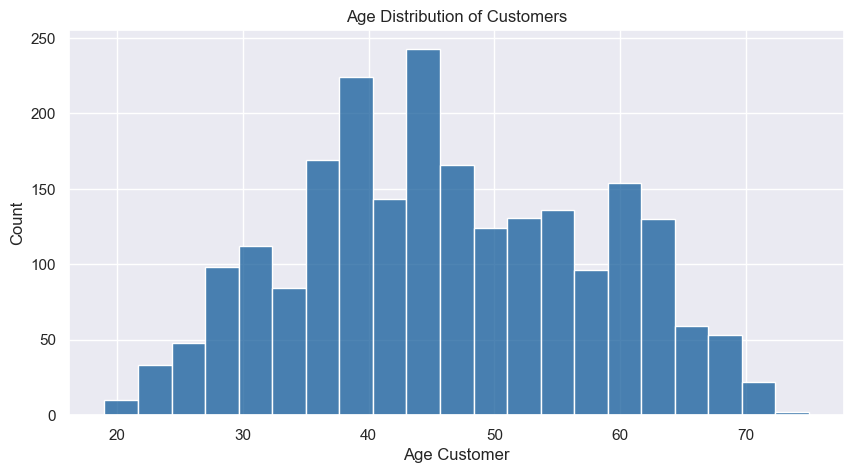

In [397]:
#berdasarkan age
fig, ax = plt.subplots(figsize=(10,5))

sns.histplot(data=df['Age'], color='#125B9A')
ax.set(title='Age Distribution of Customers')
plt.xlabel('Age Customer')
plt.ylabel('Count')

In [398]:
age_clas_count = df['AgeClass'].value_counts()
age_clas_count

AgeClass
Middle Age Adult    1177
Adult                693
Senior Adult         365
Teen                   2
Name: count, dtype: int64

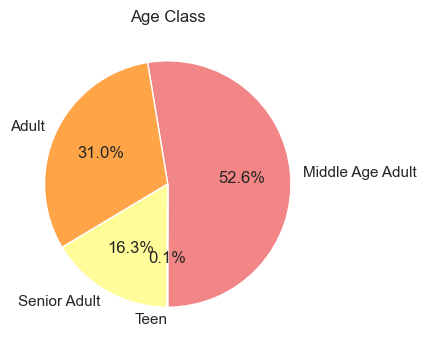

In [399]:
fig, ax = plt.subplots(figsize=(4,4))

ax.pie(
    age_clas_count,
    labels=age_clas_count.index,
    autopct='%1.1f%%',
    colors=['#F28585', '#FFA447', '#FFFC99', '#B7E5B4'],
startangle=270

)
plt.title('Age Class')
plt.show()

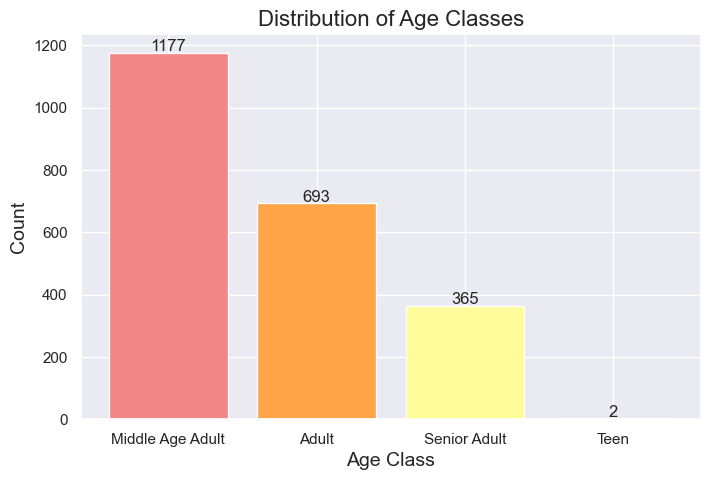

In [400]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(age_clas_count.index, age_clas_count.values,
       color=['#F28585', '#FFA447', '#FFFC99', '#B7E5B4'])


ax.set_title('Distribution of Age Classes', fontsize=16)
ax.set_xlabel('Age Class', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Menampilkan nilai di atas setiap bar
for i, k in enumerate(age_clas_count.values):
    ax.text(i, k + 5, str(k), ha='center', fontsize=12)

# Menampilkan grafik
plt.show()

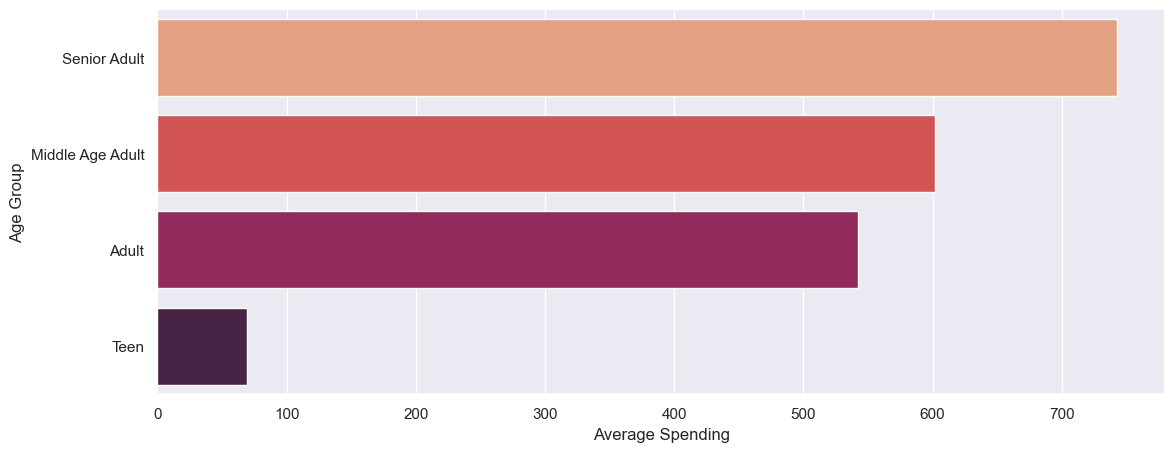

In [401]:
#total spending berdasarkan age class

ageclassspending = df.groupby('AgeClass')['TotalSpending_Product'].mean().sort_values(ascending=False)
df_ageclassspending = ageclassspending.reset_index()
df_ageclassspending.columns = ['Age Class', 'Average Spending']
#df_ageclassspending = pd.DataFrame(list(age_class_counts.item()), columns=['AgeClass', 'Average Spending'])

plt.figure(figsize=(13,5))
sns.barplot(data=df_ageclassspending, x='Average Spending', y ='Age Class',palette='rocket_r' , hue='Age Class')
plt.xlabel('Average Spending')
plt.ylabel('Age Group')

plt.show()

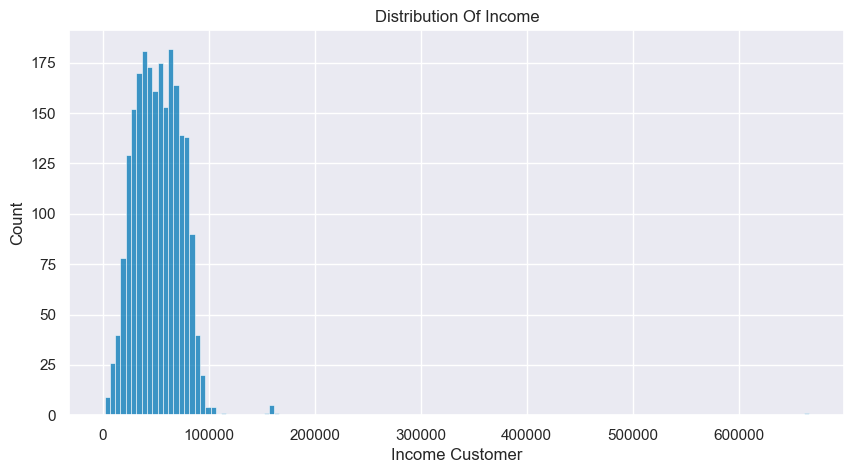

In [402]:
#distribution income
fig, ax = plt.subplots(figsize=(10,5))

sns.histplot(data=df['Income'], color='#0077b6')
ax.set_title('Distribution Of Income')
plt.xlabel('Income Customer')
plt.ylabel('Count')

plt.show()

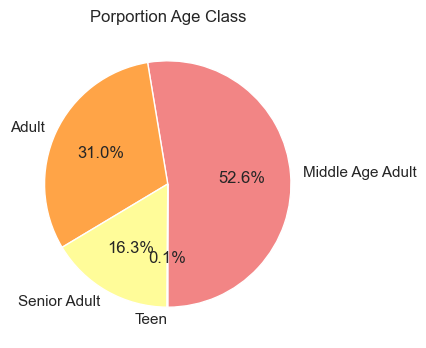

In [403]:
fig, ax = plt.subplots(figsize=(4,4))

ax.pie(
    age_clas_count,
    labels=age_clas_count.index,
    autopct='%1.1f%%',
    colors=['#F28585', '#FFA447', '#FFFC99', '#B7E5B4'],
    startangle=270

)
plt.title('Porportion Age Class')
plt.show()

In [404]:
edu = df['Education'].value_counts()


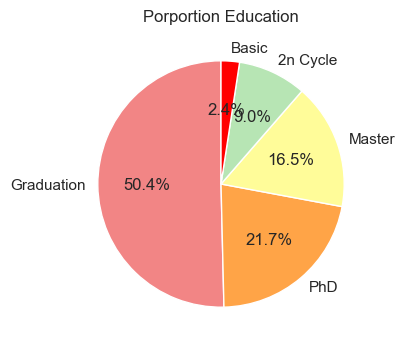

In [405]:
#berdasarkan kelulusan

fig, ax = plt.subplots(figsize=(4,4))

ax.pie(
    edu,
    labels=edu.index,
    autopct='%1.1f%%',
    colors=['#F28585', '#FFA447', '#FFFC99', '#B7E5B4', 'Red'],
    startangle=90

)
plt.title('Porportion Education')
plt.show() 


In [406]:
df['Marital_Status'].value_counts()

Marital_Status
Relationship    1520
Single           717
Name: count, dtype: int64

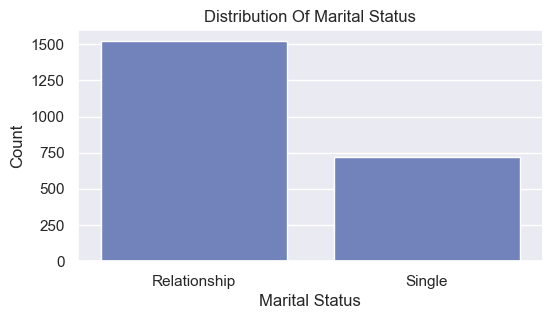

In [407]:
#marital_status
fig, ax = plt.subplots(figsize=(6,3))

sns.barplot(
    data=df['Marital_Status'].value_counts(),
    color='#667BC6'
    
)

ax.set_title('Distribution Of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


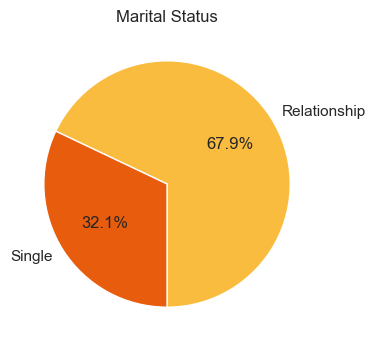

In [408]:
fig, ax = plt.subplots(figsize=(4,4))

plt.pie(
    df['Marital_Status'].value_counts(),
    labels=df['Marital_Status'].value_counts().index,
    autopct='%1.1f%%',
    colors=['#FABC3F', '#E85C0D'],
    startangle=270
)

plt.title('Marital Status')
plt.show()

Text(0, 0.5, 'Count')

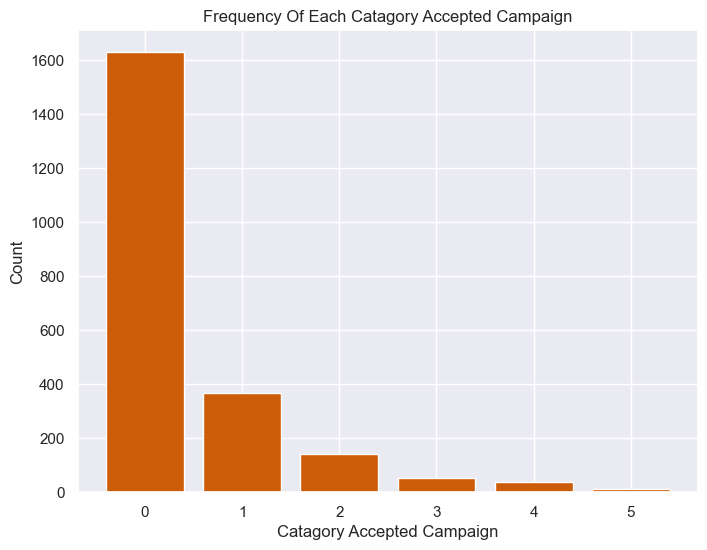

In [409]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(
    df['TotalCampaign'].value_counts().index,
    df['TotalCampaign'].value_counts().values,
    color= '#CD5C08' 
)
ax.set_title('Frequency Of Each Catagory Accepted Campaign')
ax.set_xlabel('Catagory Accepted Campaign')
ax.set_ylabel('Count')

In [410]:
df['TotalCampaign'].value_counts()

TotalCampaign
0    1629
1     369
2     142
3      51
4      36
5      10
Name: count, dtype: int64

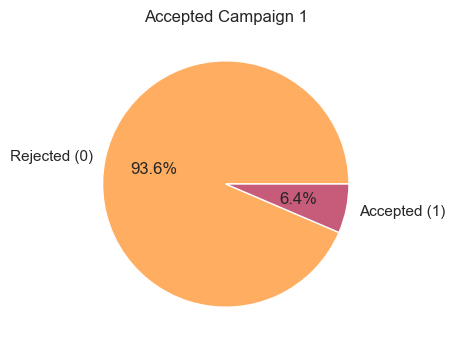

In [411]:
#masing-masing campaign
labels = ['Accepted (1)' if i == 1 else 'Rejected (0)' for i in df['AcceptedCmp1'].value_counts().index]

fig, ax = plt.subplots(figsize=(4,4))
plt.pie(
    df['AcceptedCmp1'].value_counts(),
    labels=labels,
    autopct='%1.1f%%',
    colors=['#FFAD60', '#C75B7A']
    )
plt.title('Accepted Campaign 1')
plt.show()



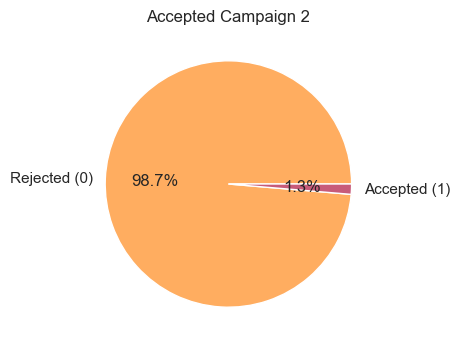

In [412]:
#masing-masing campaign
labels = ['Accepted (1)' if i == 1 else 'Rejected (0)' for i in df['AcceptedCmp2'].value_counts().index]

fig, ax = plt.subplots(figsize=(4,4))
plt.pie(
    df['AcceptedCmp2'].value_counts(),
    labels=labels,
    autopct='%1.1f%%',
    colors=['#FFAD60', '#C75B7A']
    )
plt.title('Accepted Campaign 2')
plt.show()



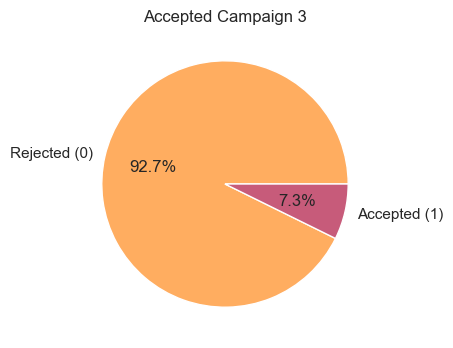

In [413]:
#masing-masing campaign
labels = ['Accepted (1)' if i == 1 else 'Rejected (0)' for i in df['AcceptedCmp3'].value_counts().index]

fig, ax = plt.subplots(figsize=(4,4))
plt.pie(
    df['AcceptedCmp3'].value_counts(),
    labels=labels,
    autopct='%1.1f%%',
    colors=['#FFAD60', '#C75B7A']
    )
plt.title('Accepted Campaign 3')
plt.show()



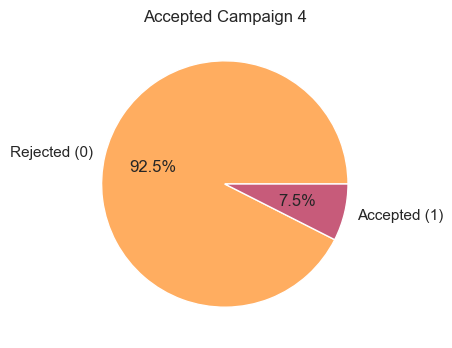

In [414]:
#masing-masing campaign
labels = ['Accepted (1)' if i == 1 else 'Rejected (0)' for i in df['AcceptedCmp4'].value_counts().index]

fig, ax = plt.subplots(figsize=(4,4))
plt.pie(
    df['AcceptedCmp4'].value_counts(),
    labels=labels,
    autopct='%1.1f%%',
    colors=['#FFAD60', '#C75B7A']
    )
plt.title('Accepted Campaign 4')
plt.show()



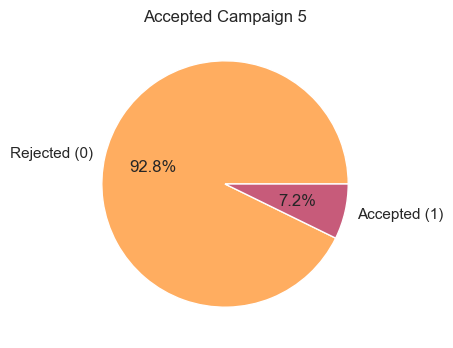

In [415]:
#masing-masing campaign
labels = ['Accepted (1)' if i == 1 else 'Rejected (0)' for i in df['AcceptedCmp5'].value_counts().index]

fig, ax = plt.subplots(figsize=(4,4))
plt.pie(
    df['AcceptedCmp5'].value_counts(),
    labels=labels,
    autopct='%1.1f%%',
    colors=['#FFAD60', '#C75B7A']
    )
plt.title('Accepted Campaign 5')
plt.show()



In [416]:
df[['Childreen']]

Childreen
0             0
1             2
2             0
3             1
4             1
...         ...
2235          1
2236          3
2237          0
2238          1
2239          2

[2237 rows x 1 columns]

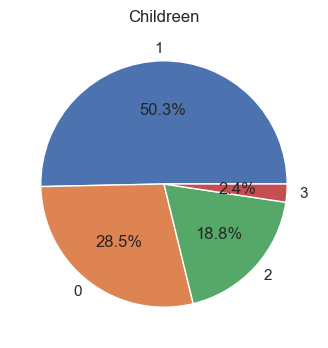

In [417]:
#kolom childreen

fig, ax = plt.subplots(figsize=(4,4))
plt.pie(
    df['Childreen'].value_counts(),
    labels=df['Childreen'].value_counts().index,
    autopct='%1.1f%%',
    )
plt.title('Childreen')
plt.show()



In [418]:
df.dtypes

ID                                int64
Year_Birth                        int64
Education                        object
Marital_Status                   object
Income                          float64
Kidhome                           int64
Teenhome                          int64
Dt_Customer              datetime64[ns]
Recency                           int64
Wine                              int64
Fruits                            int64
Meat                              int64
Fish                              int64
Sweet                             int64
Gold                              int64
NumDealsPurchases                 int64
Web                               int64
Catalog                           int64
Store                             int64
WebVisit                          int64
AcceptedCmp3                      int64
AcceptedCmp4                      int64
AcceptedCmp5                      int64
AcceptedCmp1                      int64
AcceptedCmp2                      int64


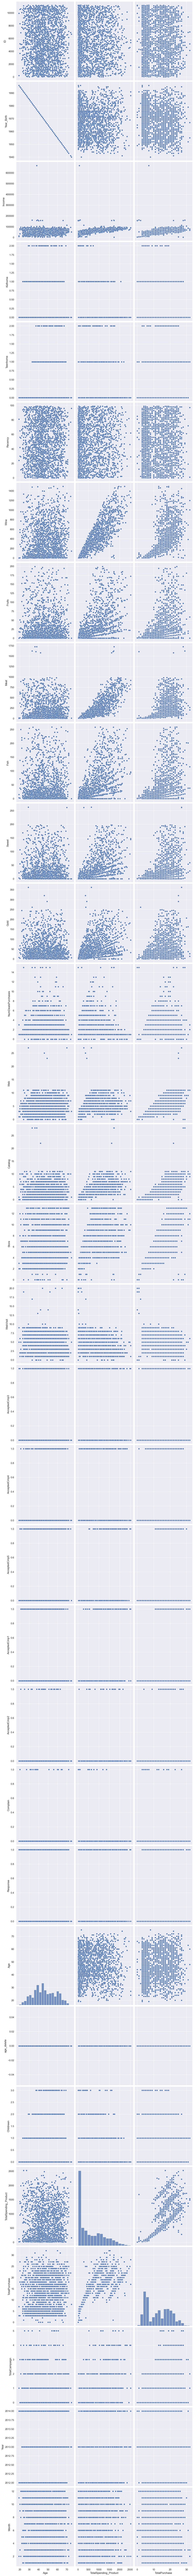

In [419]:
sns.pairplot(df, x_vars=['Age', 'TotalSpending_Product', 'TotalPurchase'], height=5, aspect=0.8)
plt.show()

In [420]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation   Relationship  71613.0        0   
3      6182        1984  Graduation   Relationship  26646.0        1   
4      5324        1981         PhD   Relationship  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation   Relationship  61223.0        0   
2236   4001        1946         PhD   Relationship  64014.0        2   
2237   7270        1981  Graduation         Single  56981.0        0   
2238   8235        1956      Master   Relationship  69245.0        0   
2239   9405        1954         PhD   Relationship  52869.0        1   

      Teenhome Dt_Customer  Recency  Wine  ...  age_delete          AgeClass  \
0            0  2012-09-04       58   635  ...       False  Middle Age Adult   
1            1  2014-03-08       38    11  ...       False      Senior Adult   
2            0  2013-08-21       26   426  ...       False  Middle Age Adult   
3            0  2014-02-10       26    11  ...       False             Adult   
4            0  2014-01-19       94   173  ...       False             Adult   
...        ...         ...      ...   ...  ...         ...               ...   
2235         1  2013-06-13       46   709  ...       False  Middle Age Adult   
2236         1  2014-06-10       56   406  ...       False      Senior Adult   
2237         0  2014-01-25       91   908  ...       False             Adult   
2238         1  2014-01-24        8   428  ...       False  Middle Age Adult   
2239         1  2012-10-15       40    84  ...       False      Senior Adult   

      Education_Cust  Childreen  TotalSpending_Product  TotalPurchase  \
0           Graduate          0                   1617             22   
1           Graduate          2                     27              4   
2           Graduate          0                    776             20   
3           Graduate          1                     53              6   
4           Graduate          1                    422             14   
...              ...        ...                    ...            ...   
2235        Graduate          1                   1341             16   
2236        Graduate          3                    444             15   
2237        Graduate          0                   1241             18   
2238        Graduate          1                    843             21   
2239        Graduate          2                    172              8   

      TotalCampaign  Year  Month  MonthYear  
0                 1  2012      9    2012-09  
1                 0  2014      3    2014-03  
2                 0  2013      8    2013-08  
3                 0  2014      2    2014-02  
4                 0  2014      1    2014-01  
...             ...   ...    ...        ...  
2235              0  2013      6    2013-06  
2236              1  2014      6    2014-06  
2237              1  2014      1    2014-01  
2238              0  2014      1    2014-01  
2239              1  2012     10    2012-10  

[2237 rows x 38 columns]

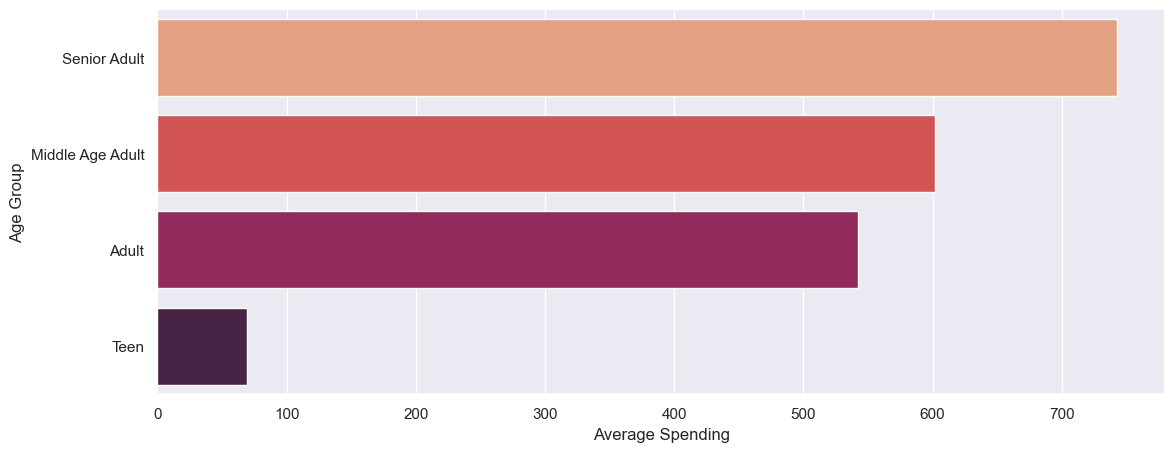

In [421]:
#total spending berdasarkan age class

ageclassspending = df.groupby('AgeClass')['TotalSpending_Product'].mean().sort_values(ascending=False)
df_ageclassspending = ageclassspending.reset_index()
df_ageclassspending.columns = ['Age Class', 'Average Spending']
#df_ageclassspending = pd.DataFrame(list(age_class_counts.item()), columns=['AgeClass', 'Average Spending'])

plt.figure(figsize=(13,5))
sns.barplot(data=df_ageclassspending, x='Average Spending', y ='Age Class',palette='rocket_r' , hue='Age Class')
plt.xlabel('Average Spending')
plt.ylabel('Age Group')

plt.show()

<Figure size 1200x900 with 0 Axes>

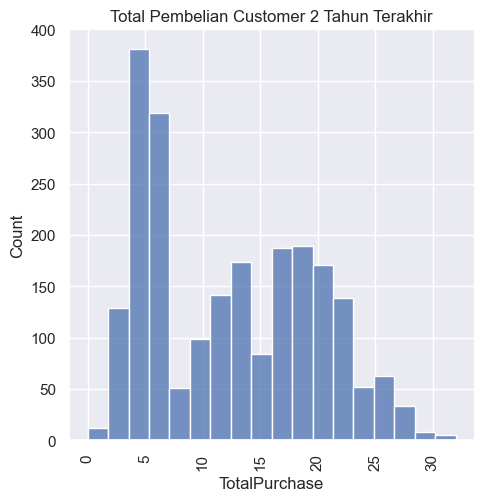

In [422]:
sns.set()
plt.figure(figsize=(12,9))
sns.displot(df['TotalPurchase'])
plt.xticks(rotation = 90)
plt.title('Total Pembelian Customer 2 Tahun Terakhir')
plt.show()

In [423]:
# Menghitung jumlah nilai 0 dan 1 di setiap kolom AcceptedCmp1 hingga AcceptedCmp5
total_accepted = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].apply(pd.Series.value_counts)

# Menjumlahkan hasil value_counts untuk semua kolom
total_counts = total_accepted.sum(axis=1)

# Menampilkan hasil
print(total_counts)


0    10519
1      666
dtype: int64


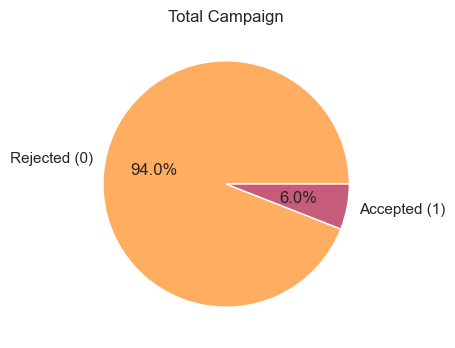

In [424]:
#masing-masing campaign
labels = ['Accepted (1)' if i == 1 else 'Rejected (0)' for i in total_counts.index]

fig, ax = plt.subplots(figsize=(4,4))
plt.pie(
   total_counts,
    labels=labels,
    autopct='%1.1f%%',
    colors=['#FFAD60', '#C75B7A']
    )
plt.title('Total Campaign')
plt.show()



In [477]:
df['Wine'].mean()



np.float64(303.99552972731334)

In [478]:
df['Fruits'].mean()

np.float64(26.27045149754135)

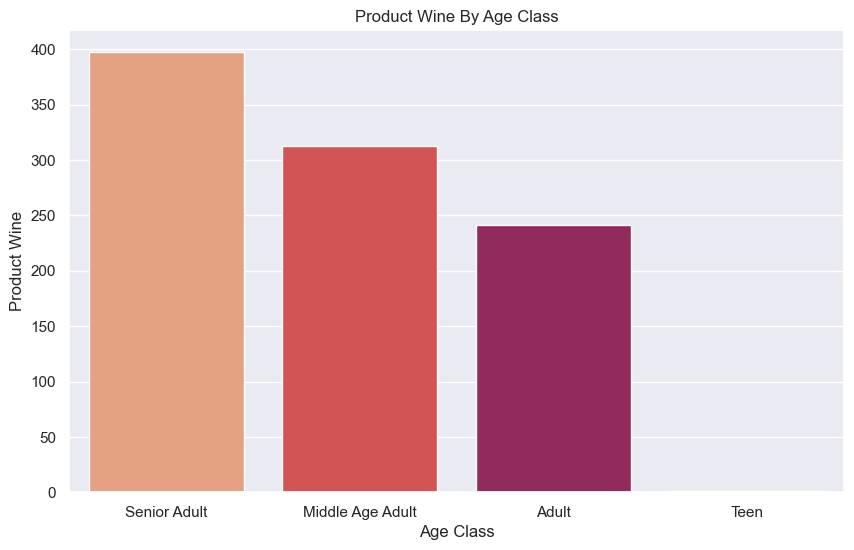

In [480]:
#fish produk berdasarkan usia
product_wine= df.groupby('AgeClass')['Wine'].mean().sort_values(ascending=False)
wine_mean = product_wine.reset_index()
wine_mean.columns=['AgeClass', 'Average Wine']

plt.figure(figsize=(10,6))
sns.barplot(data=wine_mean, x='AgeClass', y ='Average Wine',palette='rocket_r' , hue='AgeClass')
plt.xlabel('Age Class')
plt.ylabel('Product Wine')
plt.title('Product Wine By Age Class')

plt.show()


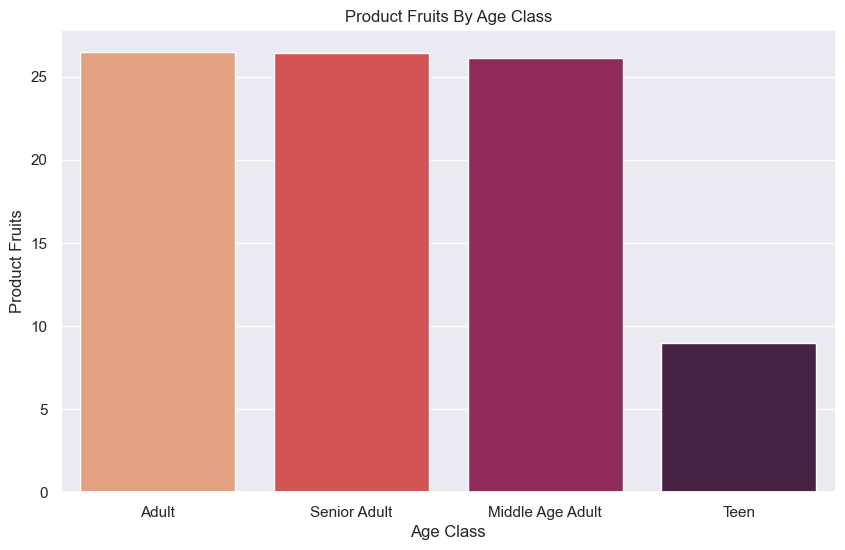

In [426]:
#fruits produk berdasarkan usia
product_fruits= df.groupby('AgeClass')['Fruits'].mean().sort_values(ascending=False)
fruits_mean = product_fruits.reset_index()
fruits_mean.columns=['AgeClass', 'Average Fruits']

plt.figure(figsize=(10,6))
sns.barplot(data=fruits_mean, x='AgeClass', y ='Average Fruits',palette='rocket_r' , hue='AgeClass')
plt.xlabel('Age Class')
plt.ylabel('Product Fruits')
plt.title('Product Fruits By Age Class')

plt.show()



In [427]:
fruits_mean

AgeClass  Average Fruits
0             Adult       26.467532
1      Senior Adult       26.449315
2  Middle Age Adult       26.128292
3              Teen        9.000000

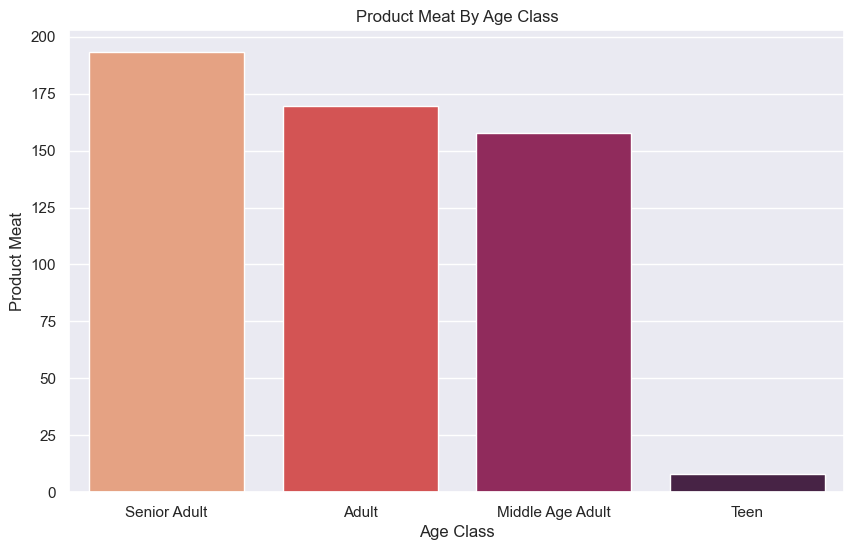

In [428]:
#Meat produk berdasarkan usia
product_meat= df.groupby('AgeClass')['Meat'].mean().sort_values(ascending=False)
meat_mean = product_meat.reset_index()
meat_mean.columns=['AgeClass', 'Sum Meat']

plt.figure(figsize=(10,6))
sns.barplot(data=meat_mean, x='AgeClass', y ='Sum Meat',palette='rocket_r' , hue='AgeClass')
plt.xlabel('Age Class')
plt.ylabel('Product Meat')
plt.title('Product Meat By Age Class')

plt.show()


In [429]:
meat_mean

AgeClass    Sum Meat
0      Senior Adult  193.183562
1             Adult  169.473304
2  Middle Age Adult  157.536109
3              Teen    8.000000

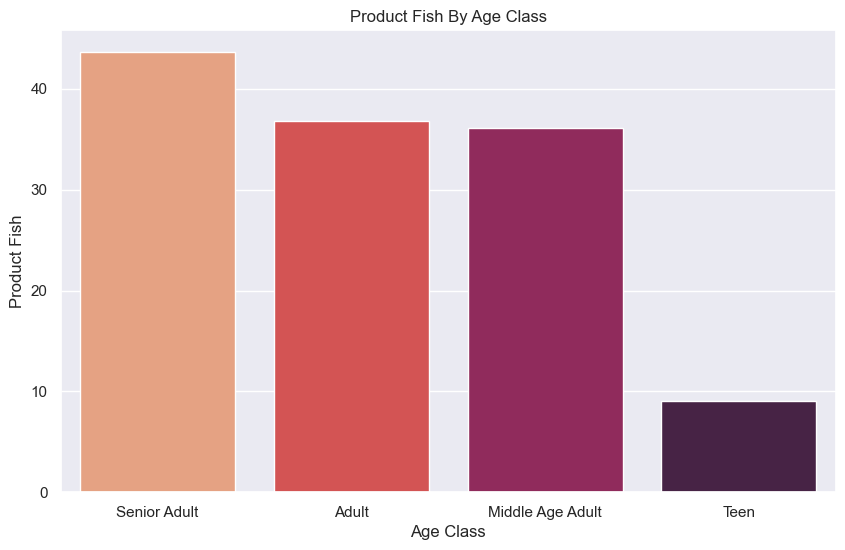

In [430]:
#fish produk berdasarkan usia
product_fish= df.groupby('AgeClass')['Fish'].mean().sort_values(ascending=False)
fish_mean = product_fish.reset_index()
fish_mean.columns=['AgeClass', 'Average Fish']

plt.figure(figsize=(10,6))
sns.barplot(data=fish_mean, x='AgeClass', y ='Average Fish',palette='rocket_r' , hue='AgeClass')
plt.xlabel('Age Class')
plt.ylabel('Product Fish')
plt.title('Product Fish By Age Class')

plt.show()


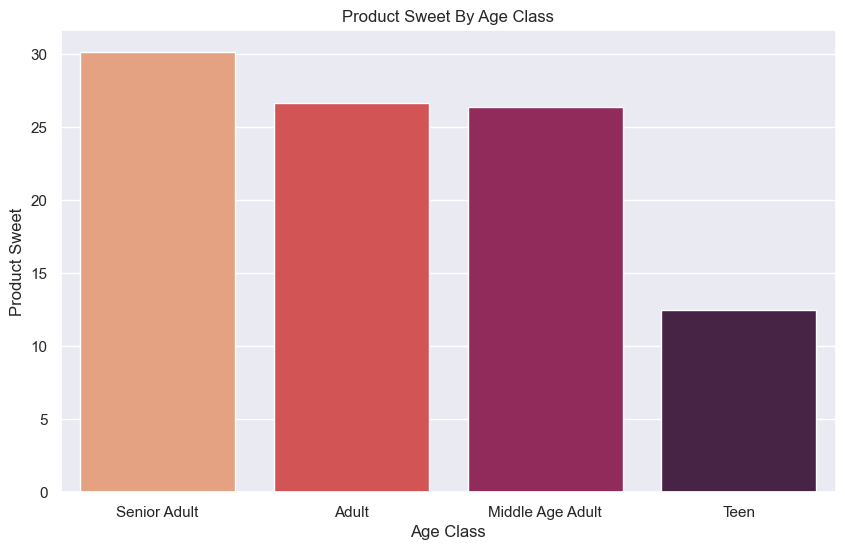

In [431]:
#sweet produk berdasarkan usia
product_sweet = df.groupby('AgeClass')['Sweet'].mean().sort_values(ascending=False)
sweet_mean = product_sweet.reset_index()
sweet_mean.columns=['AgeClass', 'Average Sweet']

plt.figure(figsize=(10,6))
sns.barplot(data=sweet_mean, x='AgeClass', y ='Average Sweet',palette='rocket_r' , hue='AgeClass')
plt.xlabel('Age Class')
plt.ylabel('Product Sweet')
plt.title('Product Sweet By Age Class')

plt.show()


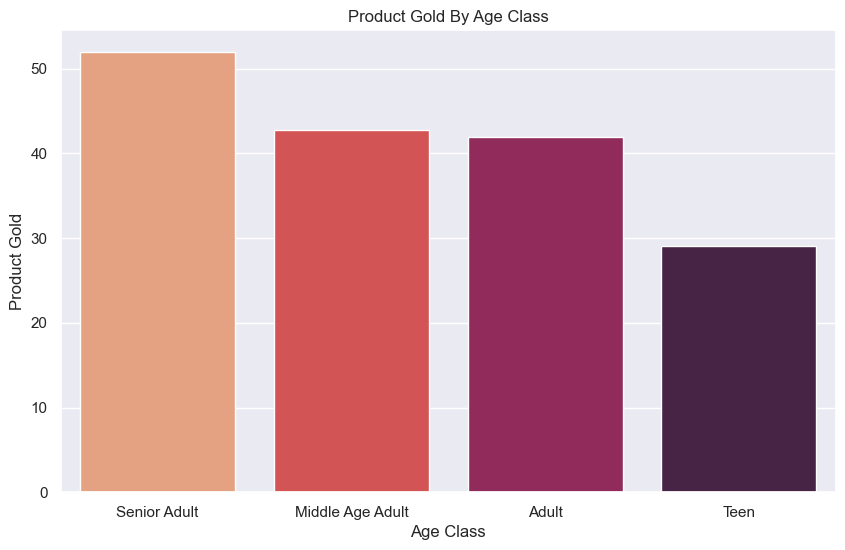

In [432]:
#gold produk berdasarkan usia
product_gold= df.groupby('AgeClass')['Gold'].mean().sort_values(ascending=False)
gold_mean = product_gold.reset_index()
gold_mean.columns=['AgeClass', 'Average Gold']

plt.figure(figsize=(10,6))
sns.barplot(data=gold_mean, x='AgeClass', y ='Average Gold',palette='rocket_r' , hue='AgeClass')
plt.xlabel('Age Class')
plt.ylabel('Product Gold')
plt.title('Product Gold By Age Class')

plt.show()




In [433]:
df_ageclassspending

Age Class  Average Spending
0      Senior Adult        742.643836
1  Middle Age Adult        601.525913
2             Adult        542.350649
3              Teen         69.000000

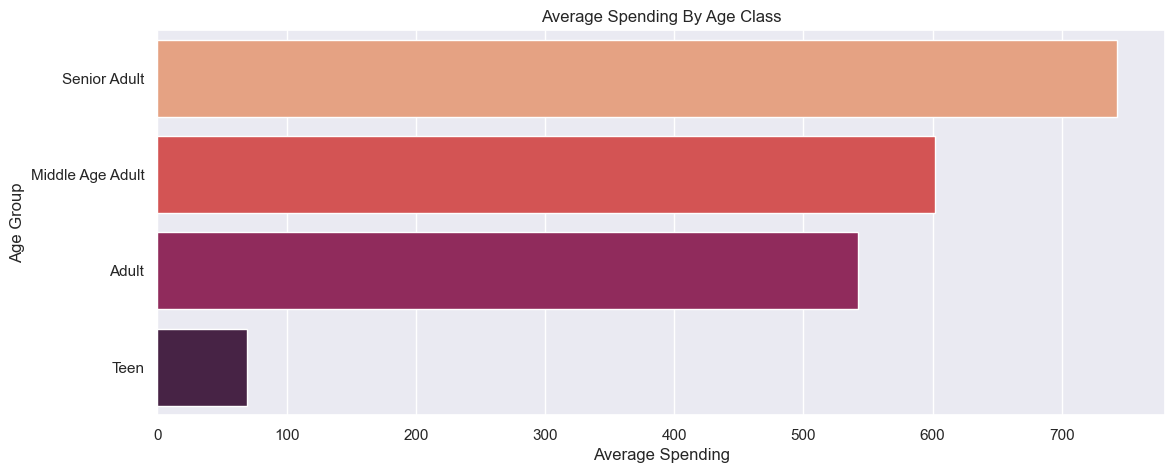

In [434]:
#total spending berdasarkan age class

ageclassspending = df.groupby('AgeClass')['TotalSpending_Product'].mean().sort_values(ascending=False)
df_ageclassspending = ageclassspending.reset_index()
df_ageclassspending.columns = ['Age Class', 'Average Spending']
#df_ageclassspending = pd.DataFrame(list(age_class_counts.item()), columns=['AgeClass', 'Average Spending'])

plt.figure(figsize=(13,5))
sns.barplot(data=df_ageclassspending, x='Average Spending', y ='Age Class',palette='rocket_r' , hue='Age Class')
plt.xlabel('Average Spending')
plt.ylabel('Age Group')
plt.title('Average Spending By Age Class')

plt.show()

In [435]:
age_income = df.groupby('AgeClass')['Income'].sum().sort_values(ascending=False)
df_age_income = age_income.reset_index()
df_age_income.columns=['AgeClass', 'Income']
df_age_income

AgeClass        Income
0  Middle Age Adult  6.210676e+07
1             Adult  3.330091e+07
2      Senior Adult  2.142391e+07
3              Teen  2.192100e+04

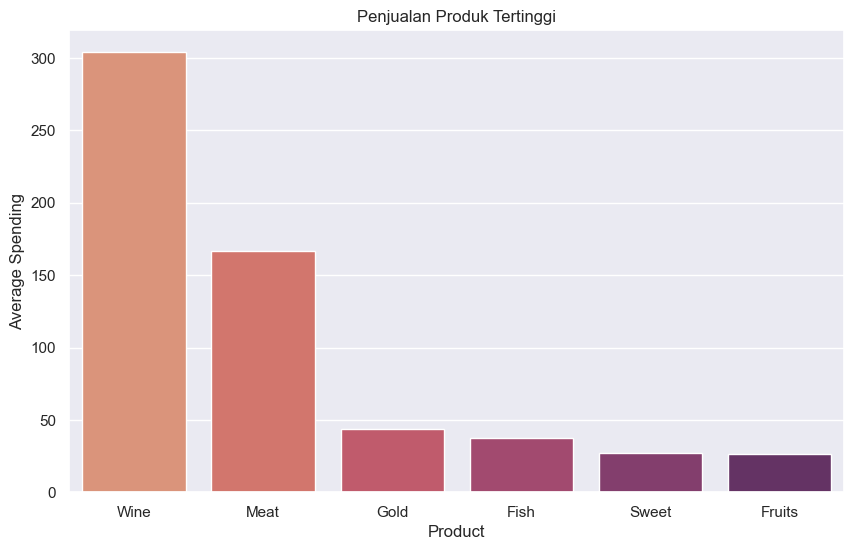

In [436]:
product1 = df[['Wine', 'Meat', 'Fish','Fruits','Sweet', 'Gold' ]]
product1_mean  = product1.mean(axis=0).sort_values(ascending=False)
df_product_mean = pd.DataFrame(list(product1_mean.items()), columns=['Product','Average Spending'])

fig, ax=plt.subplots(figsize=(10,6))

sns.barplot(data=df_product_mean, x='Product', y='Average Spending', hue='Product',palette='flare')
plt.title('Penjualan Produk Tertinggi')
plt.xlabel('Product')
plt.ylabel('Average Spending')
plt.show()

In [437]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation   Relationship  71613.0        0   
3      6182        1984  Graduation   Relationship  26646.0        1   
4      5324        1981         PhD   Relationship  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation   Relationship  61223.0        0   
2236   4001        1946         PhD   Relationship  64014.0        2   
2237   7270        1981  Graduation         Single  56981.0        0   
2238   8235        1956      Master   Relationship  69245.0        0   
2239   9405        1954         PhD   Relationship  52869.0        1   

      Teenhome Dt_Customer  Recency  Wine  ...  age_delete          AgeClass  \
0            0  2012-09-04       58   635  ...       False  Middle Age Adult   
1            1  2014-03-08       38    11  ...       False      Senior Adult   
2            0  2013-08-21       26   426  ...       False  Middle Age Adult   
3            0  2014-02-10       26    11  ...       False             Adult   
4            0  2014-01-19       94   173  ...       False             Adult   
...        ...         ...      ...   ...  ...         ...               ...   
2235         1  2013-06-13       46   709  ...       False  Middle Age Adult   
2236         1  2014-06-10       56   406  ...       False      Senior Adult   
2237         0  2014-01-25       91   908  ...       False             Adult   
2238         1  2014-01-24        8   428  ...       False  Middle Age Adult   
2239         1  2012-10-15       40    84  ...       False      Senior Adult   

      Education_Cust  Childreen  TotalSpending_Product  TotalPurchase  \
0           Graduate          0                   1617             22   
1           Graduate          2                     27              4   
2           Graduate          0                    776             20   
3           Graduate          1                     53              6   
4           Graduate          1                    422             14   
...              ...        ...                    ...            ...   
2235        Graduate          1                   1341             16   
2236        Graduate          3                    444             15   
2237        Graduate          0                   1241             18   
2238        Graduate          1                    843             21   
2239        Graduate          2                    172              8   

      TotalCampaign  Year  Month  MonthYear  
0                 1  2012      9    2012-09  
1                 0  2014      3    2014-03  
2                 0  2013      8    2013-08  
3                 0  2014      2    2014-02  
4                 0  2014      1    2014-01  
...             ...   ...    ...        ...  
2235              0  2013      6    2013-06  
2236              1  2014      6    2014-06  
2237              1  2014      1    2014-01  
2238              0  2014      1    2014-01  
2239              1  2012     10    2012-10  

[2237 rows x 38 columns]

In [438]:
df_age_income = df.groupby('AgeClass')['Income'].mean().sort_values(ascending=False)
df_ageclassincome = df_age_income.reset_index()
df_ageclassincome.columns=['AgeClass', 'Average Income']
df_ageclassincome

AgeClass  Average Income
0      Senior Adult    58695.632892
1  Middle Age Adult    52766.997892
2             Adult    48053.254701
3              Teen    10960.500000

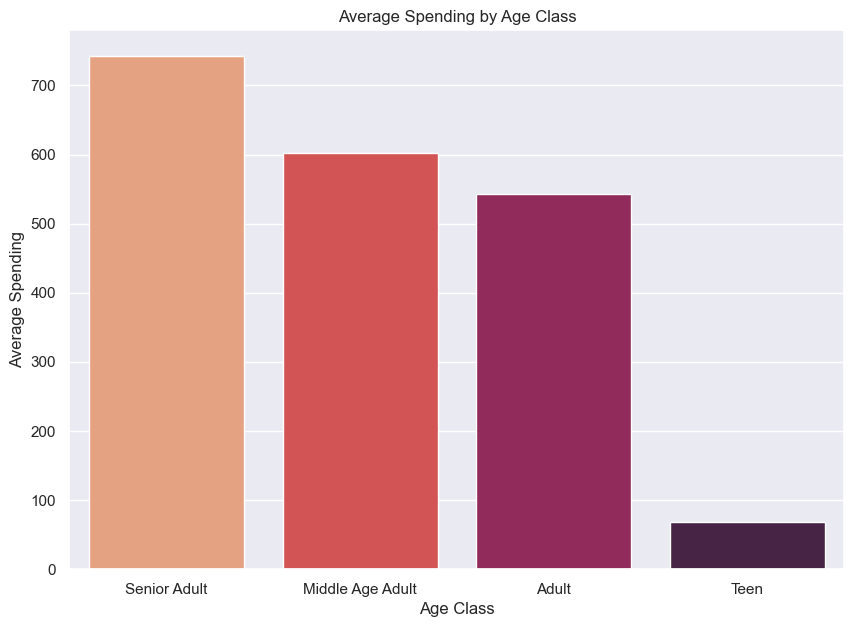

In [439]:
plt.figure(figsize=(10,7))
sns.barplot(data=df_ageclassspending, x='Age Class', y='Average Spending', palette='rocket_r', hue='Age Class')
plt.ylabel('Average Spending')
plt.xlabel('Age Class')
plt.title('Average Spending by Age Class')
plt.show()

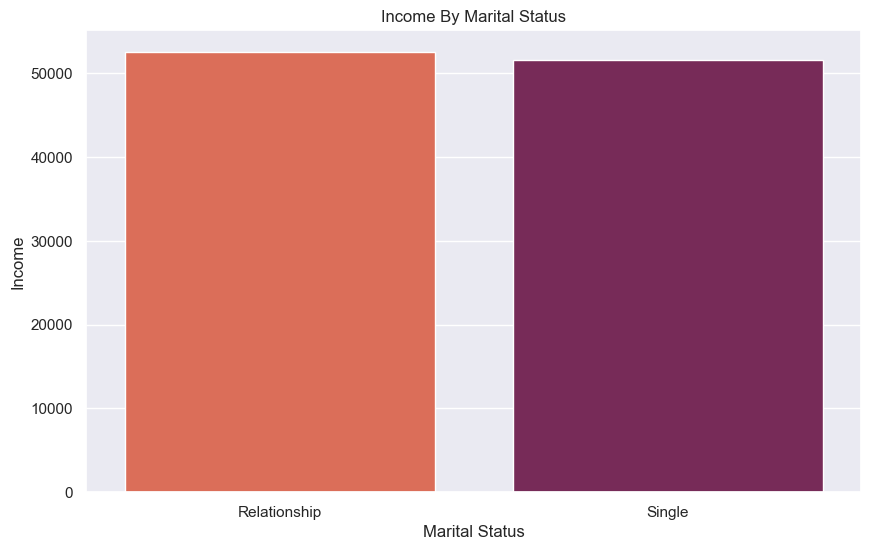

In [440]:
marital_status= df.groupby('Marital_Status')['Income'].mean().sort_values(ascending=False)
df_maritastatus = marital_status.reset_index()
df_maritastatus.columns=['Marital_Status', 'Average Income']

plt.figure(figsize=(10,6))
sns.barplot(data=df_maritastatus, x='Marital_Status', y ='Average Income',palette='rocket_r' , hue='Marital_Status')
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.title('Income By Marital Status')

plt.show()


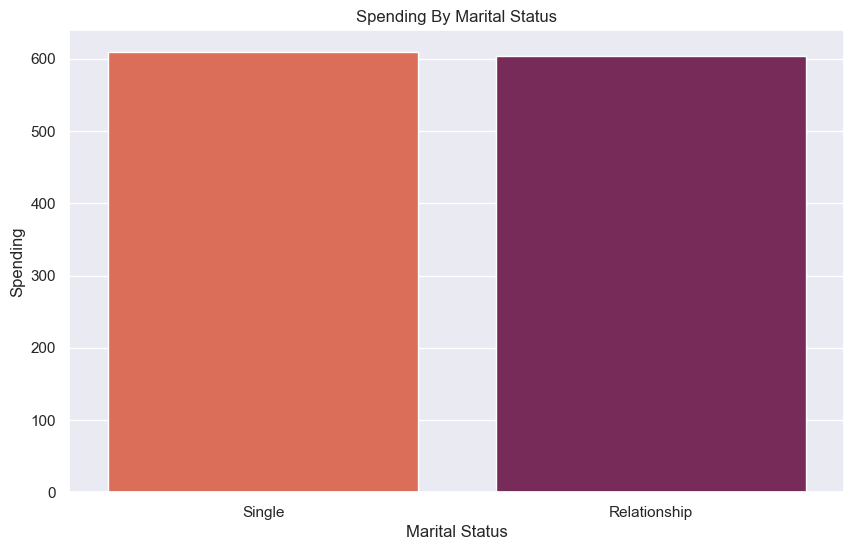

In [441]:
marital_status1= df.groupby('Marital_Status')['TotalSpending_Product'].mean().sort_values(ascending=False)
df_maritastatus1 = marital_status1.reset_index()
df_maritastatus1.columns=['Marital_Status', 'Average Spending']

plt.figure(figsize=(10,6))
sns.barplot(data=df_maritastatus1, x='Marital_Status', y ='Average Spending',palette='rocket_r' , hue='Marital_Status')
plt.xlabel('Marital Status')
plt.ylabel('Spending')
plt.title('Spending By Marital Status')


plt.show()


In [442]:
df_maritastatus1

Marital_Status  Average Spending
0         Single        609.057183
1   Relationship        604.180263

In [443]:
df_maritastatus

Marital_Status  Average Income
0   Relationship    52520.245244
1         Single    51635.587534

In [444]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation   Relationship  71613.0        0   
3      6182        1984  Graduation   Relationship  26646.0        1   
4      5324        1981         PhD   Relationship  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation   Relationship  61223.0        0   
2236   4001        1946         PhD   Relationship  64014.0        2   
2237   7270        1981  Graduation         Single  56981.0        0   
2238   8235        1956      Master   Relationship  69245.0        0   
2239   9405        1954         PhD   Relationship  52869.0        1   

      Teenhome Dt_Customer  Recency  Wine  ...  age_delete          AgeClass  \
0            0  2012-09-04       58   635  ...       False  Middle Age Adult   
1            1  2014-03-08       38    11  ...       False      Senior Adult   
2            0  2013-08-21       26   426  ...       False  Middle Age Adult   
3            0  2014-02-10       26    11  ...       False             Adult   
4            0  2014-01-19       94   173  ...       False             Adult   
...        ...         ...      ...   ...  ...         ...               ...   
2235         1  2013-06-13       46   709  ...       False  Middle Age Adult   
2236         1  2014-06-10       56   406  ...       False      Senior Adult   
2237         0  2014-01-25       91   908  ...       False             Adult   
2238         1  2014-01-24        8   428  ...       False  Middle Age Adult   
2239         1  2012-10-15       40    84  ...       False      Senior Adult   

      Education_Cust  Childreen  TotalSpending_Product  TotalPurchase  \
0           Graduate          0                   1617             22   
1           Graduate          2                     27              4   
2           Graduate          0                    776             20   
3           Graduate          1                     53              6   
4           Graduate          1                    422             14   
...              ...        ...                    ...            ...   
2235        Graduate          1                   1341             16   
2236        Graduate          3                    444             15   
2237        Graduate          0                   1241             18   
2238        Graduate          1                    843             21   
2239        Graduate          2                    172              8   

      TotalCampaign  Year  Month  MonthYear  
0                 1  2012      9    2012-09  
1                 0  2014      3    2014-03  
2                 0  2013      8    2013-08  
3                 0  2014      2    2014-02  
4                 0  2014      1    2014-01  
...             ...   ...    ...        ...  
2235              0  2013      6    2013-06  
2236              1  2014      6    2014-06  
2237              1  2014      1    2014-01  
2238              0  2014      1    2014-01  
2239              1  2012     10    2012-10  

[2237 rows x 38 columns]

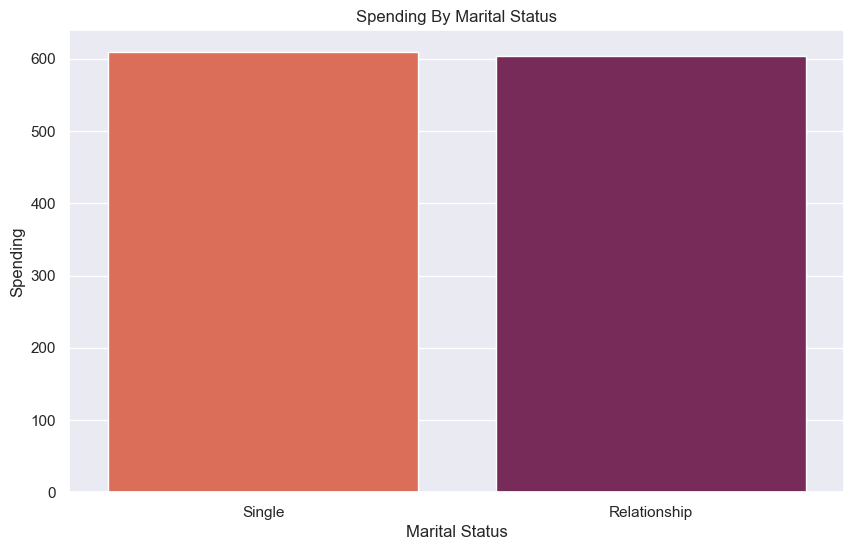

In [445]:
spending= df.groupby('Marital_Status')['TotalSpending_Product'].mean().sort_values(ascending=False)
df_spending = spending.reset_index()
df_spending.columns=['Marital_Status', 'Average Spending']

plt.figure(figsize=(10,6))
sns.barplot(data=df_spending, x='Marital_Status', y ='Average Spending',palette='rocket_r' , hue='Marital_Status')
plt.xlabel('Marital Status')
plt.ylabel('Spending')
plt.title('Spending By Marital Status')


plt.show()


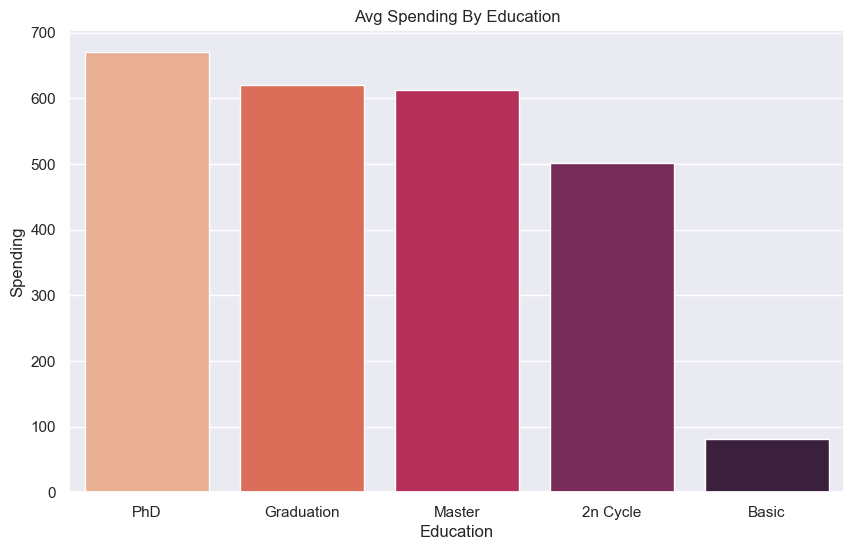

In [446]:
edu= df.groupby('Education')['TotalSpending_Product'].mean().sort_values(ascending=False)
df_edu = edu.reset_index()
df_edu.columns=['Education', 'Average Spending']

plt.figure(figsize=(10,6))
sns.barplot(data=df_edu, x='Education', y ='Average Spending',palette='rocket_r' , hue='Education')
plt.xlabel('Education')
plt.ylabel('Spending')
plt.title('Avg Spending By Education')


plt.show()


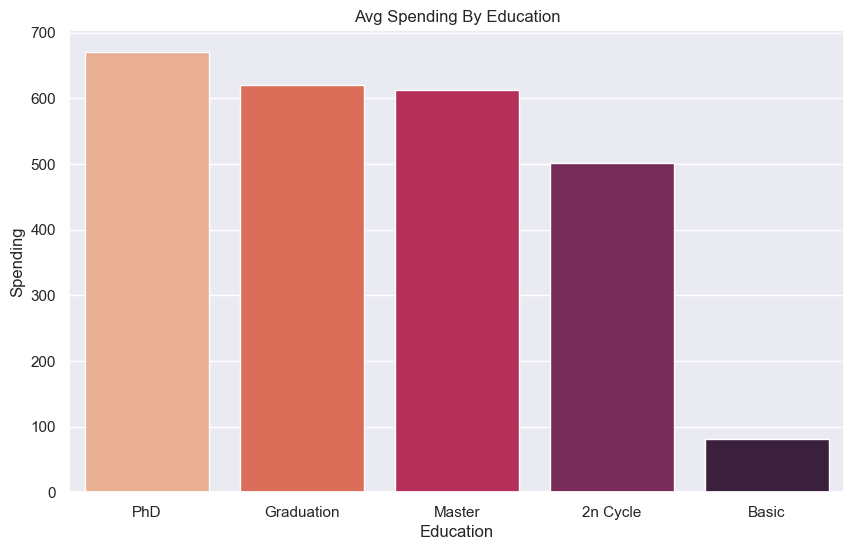

In [447]:
edu= df.groupby('Education')['TotalSpending_Product'].mean().sort_values(ascending=False)
df_edu = edu.reset_index()
df_edu.columns=['Education', 'Average Spending']

plt.figure(figsize=(10,6))
sns.barplot(data=df_edu, x='Education', y ='Average Spending',palette='rocket_r' , hue='Education')
plt.xlabel('Education')
plt.ylabel('Spending')
plt.title('Avg Spending By Education')


plt.show()


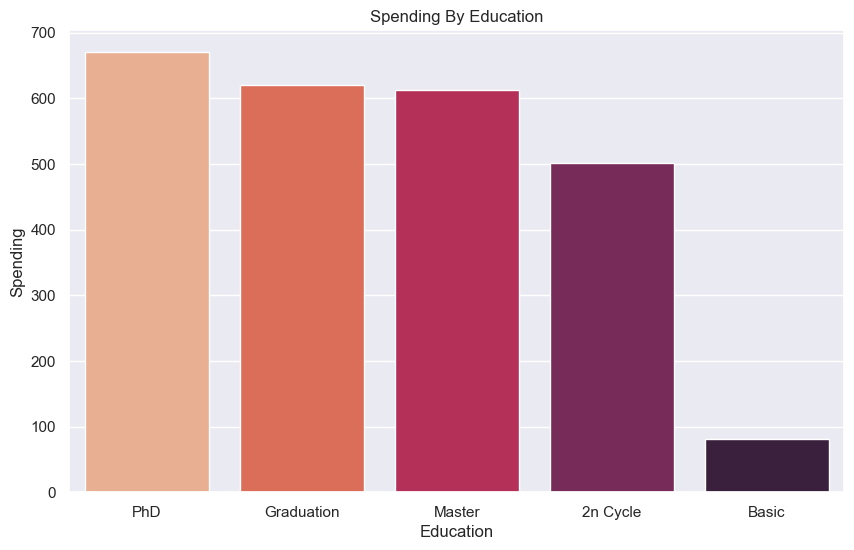

In [448]:
edu= df.groupby('Education')['TotalSpending_Product'].mean().sort_values(ascending=False)
df_edu = edu.reset_index()
df_edu.columns=['Education', 'Average Spending']

plt.figure(figsize=(10,6))
sns.barplot(data=df_edu, x='Education', y ='Average Spending',palette='rocket_r' , hue='Education')
plt.xlabel('Education')
plt.ylabel('Spending')
plt.title('Spending By Education')


plt.show()


In [449]:
df_edu

Education  Average Spending
0         PhD        669.975258
1  Graduation        619.898846
2      Master        611.781081
3    2n Cycle        501.034826
4       Basic         81.796296

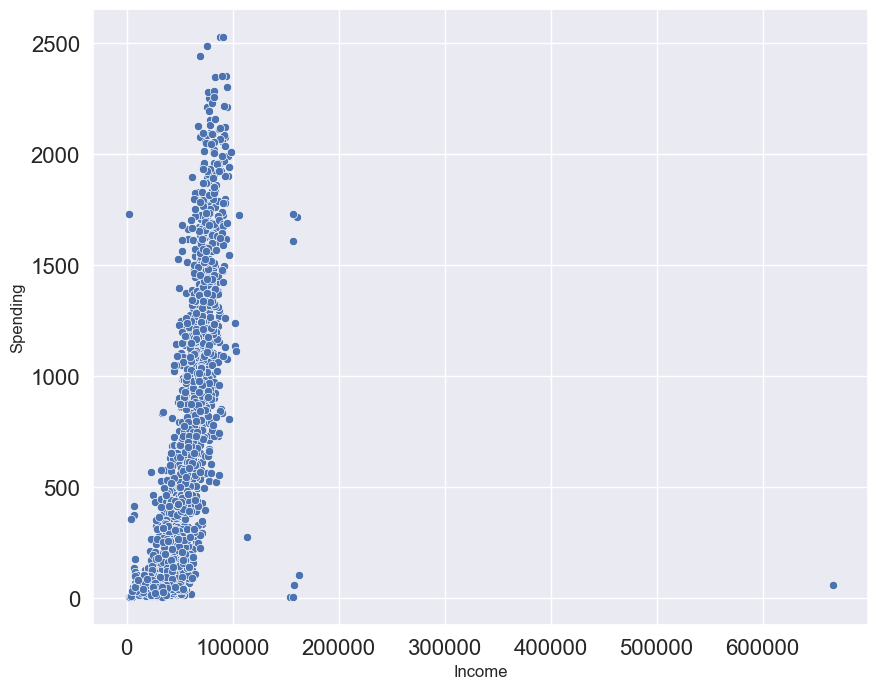

In [450]:
#income dengan spending
fig, ax = plt.subplots(figsize=(10,8))

sns.scatterplot(data=df, x=df['Income'], y=df['TotalSpending_Product'])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Income')
plt.ylabel('Spending')

plt.show()

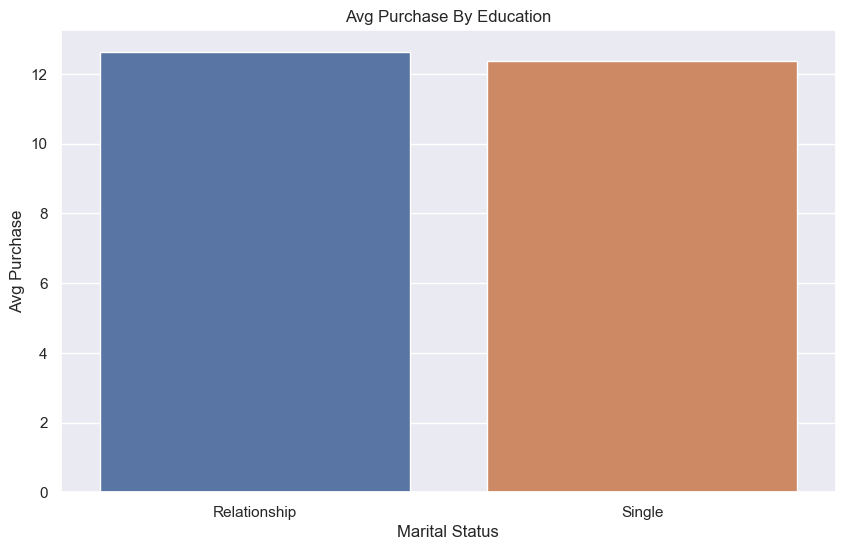

In [451]:
marital= df.groupby('Marital_Status')['TotalPurchase'].mean().sort_values(ascending=False)
df_marital= marital.reset_index()
df_marital.columns=['Marital Status', 'Average Purchase']

plt.figure(figsize=(10,6))
sns.barplot(data=df_marital, x='Marital Status', y ='Average Purchase', hue='Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Avg Purchase')
plt.title('Avg Purchase By Education')


plt.show()


In [452]:
df_marital

Marital Status  Average Purchase
0   Relationship         12.626974
1         Single         12.368201

In [465]:
web_total = df['Web'].sum()
catalog = df['Catalog'].sum()
store = df['Store'].sum()

# Buat dataframe baru dengan kolom 'web'
df_palce_purchase = pd.DataFrame({'Web': [web_total],
                       'Catalog':[catalog],
                       'Store' :[store]
                       })
df_palce_purchase

Web  Catalog  Store
0  9143     5956  12962

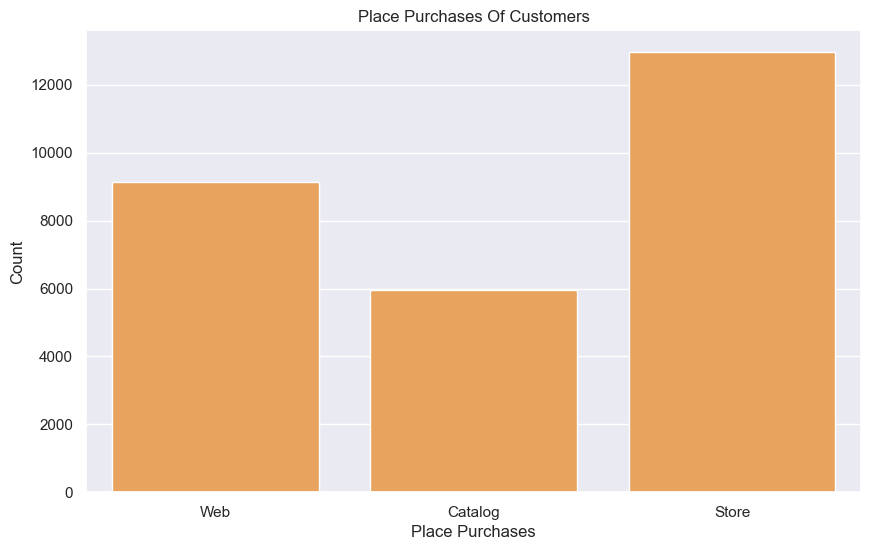

In [475]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_palce_purchase, color='#FFA447')
plt.xlabel('Place Purchases')
plt.ylabel('Count')
plt.title('Place Purchases Of Customers')


plt.show()


<Axes: >

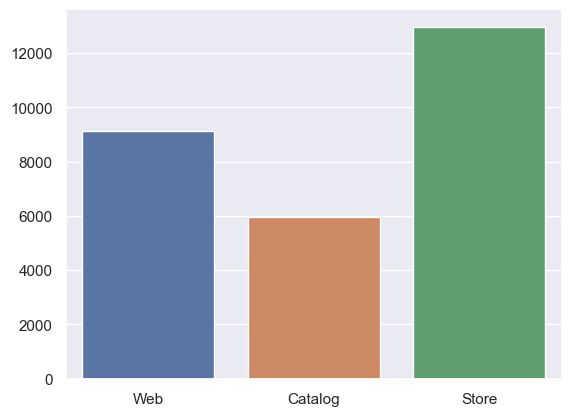

In [467]:
sns.barplot(data=df_palce_purchase)

RFM

In [453]:
df['RFM_Recency']= df['Recency'] #untuk data recency
df['RFM_Frequency']= df['TotalPurchase'] #untuk data frequency 
df['RFM_Monetary'] = df['TotalSpending_Product'] #untuk data Monetary

df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation   Relationship  71613.0        0   
3      6182        1984  Graduation   Relationship  26646.0        1   
4      5324        1981         PhD   Relationship  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation   Relationship  61223.0        0   
2236   4001        1946         PhD   Relationship  64014.0        2   
2237   7270        1981  Graduation         Single  56981.0        0   
2238   8235        1956      Master   Relationship  69245.0        0   
2239   9405        1954         PhD   Relationship  52869.0        1   

      Teenhome Dt_Customer  Recency  Wine  ...  Childreen  \
0            0  2012-09-04       58   635  ...          0   
1            1  2014-03-08       38    11  ...          2   
2            0  2013-08-21       26   426  ...          0   
3            0  2014-02-10       26    11  ...          1   
4            0  2014-01-19       94   173  ...          1   
...        ...         ...      ...   ...  ...        ...   
2235         1  2013-06-13       46   709  ...          1   
2236         1  2014-06-10       56   406  ...          3   
2237         0  2014-01-25       91   908  ...          0   
2238         1  2014-01-24        8   428  ...          1   
2239         1  2012-10-15       40    84  ...          2   

      TotalSpending_Product  TotalPurchase  TotalCampaign  Year  Month  \
0                      1617             22              1  2012      9   
1                        27              4              0  2014      3   
2                       776             20              0  2013      8   
3                        53              6              0  2014      2   
4                       422             14              0  2014      1   
...                     ...            ...            ...   ...    ...   
2235                   1341             16              0  2013      6   
2236                    444             15              1  2014      6   
2237                   1241             18              1  2014      1   
2238                    843             21              0  2014      1   
2239                    172              8              1  2012     10   

      MonthYear  RFM_Recency  RFM_Frequency  RFM_Monetary  
0       2012-09           58             22          1617  
1       2014-03           38              4            27  
2       2013-08           26             20           776  
3       2014-02           26              6            53  
4       2014-01           94             14           422  
...         ...          ...            ...           ...  
2235    2013-06           46             16          1341  
2236    2014-06           56             15           444  
2237    2014-01           91             18          1241  
2238    2014-01            8             21           843  
2239    2012-10           40              8           172  

[2237 rows x 41 columns]

Recency

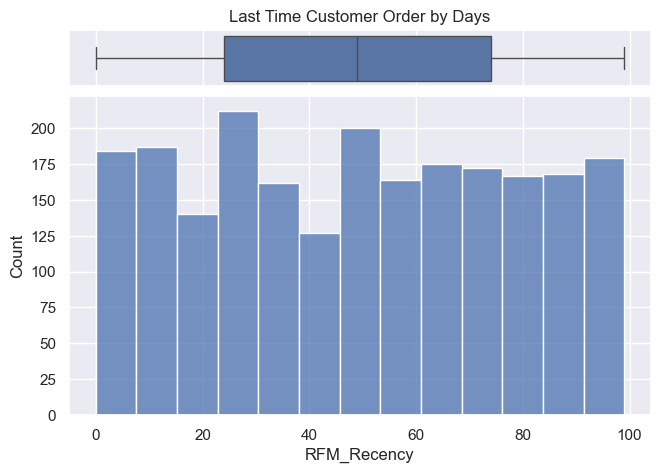

0.00     0.0
0.25    24.0
0.50    49.0
0.75    74.0
1.00    99.0
Name: RFM_Recency, dtype: float64

In [454]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df, x='RFM_Recency', ax=ax_top)
sns.histplot(data=df, x='RFM_Recency', ax=ax_bot)

ax_top.set(
    title='Last Time Customer Order by Days'
)

plt.show()
display(df['RFM_Recency'].quantile([0, 0.25, 0.5, 0.75, 1]))

Berdasarkan distribusi di atas, kita akan kelompokkan customer berdasarkan recency-nya ke dalam 4 kelompok yaitu :
- 4 (Active) : melakukan transaksi kurang dari 24 hari terakhir
- 3 (Warm) : melakukan transaksi antara 24 hingga 49 hari terakhir
- 2 (Cold) : melakukan transaksi antara 49 hingga 74 hari terakhir
- 1 (Inactive) : melakukan transaksi lebih dari 99 hari terakhir

In [455]:
df['Recency_Score'] = pd.qcut(
    df['RFM_Recency'],             # data
    q=4,                                # dibagi menjadi 4 kelompok sama banyak
    labels=[4, 3, 2, 1]                 # pelabelan, untuk recency: semakin kecil, maka semakin besar skornya
).astype(int)

df.sample(5, random_state=42)

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
1755  5394        1979     Basic         Single  16014.0        1         1   
370   5680        1984  2n Cycle   Relationship  35684.0        1         0   
1250  9606        1965       PhD   Relationship  69969.0        0         0   
852   4856        1957  2n Cycle   Relationship  82347.0        0         0   
1750  3571        1961       PhD   Relationship  63342.0        0         1   

     Dt_Customer  Recency  Wine  ...  TotalSpending_Product  TotalPurchase  \
1755  2013-03-17       42     3  ...                     38              6   
370   2014-04-22       66    10  ...                     30              4   
1250  2013-08-27       64   882  ...                   1536             12   
852   2012-11-06       38   556  ...                   1853             24   
1750  2012-10-16       48   918  ...                   1101             16   

      TotalCampaign  Year  Month  MonthYear  RFM_Recency  RFM_Frequency  \
1755              0  2013      3    2013-03           42              6   
370               0  2014      4    2014-04           66              4   
1250              3  2013      8    2013-08           64             12   
852               2  2012     11    2012-11           38             24   
1750              2  2012     10    2012-10           48             16   

      RFM_Monetary  Recency_Score  
1755            38              3  
370             30              2  
1250          1536              2  
852           1853              3  
1750          1101              3  

[5 rows x 42 columns]

Frequency

In [456]:
def f_score(x):
    if x==1:
        return 1
    elif x <= 3:
        return 2
    elif x <= 5:
        return 3
    else:
        return 4

df['Frequency_Score'] = df['RFM_Frequency'].apply(f_score)
df.sample(5, random_state=42)

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
1755  5394        1979     Basic         Single  16014.0        1         1   
370   5680        1984  2n Cycle   Relationship  35684.0        1         0   
1250  9606        1965       PhD   Relationship  69969.0        0         0   
852   4856        1957  2n Cycle   Relationship  82347.0        0         0   
1750  3571        1961       PhD   Relationship  63342.0        0         1   

     Dt_Customer  Recency  Wine  ...  TotalPurchase  TotalCampaign  Year  \
1755  2013-03-17       42     3  ...              6              0  2013   
370   2014-04-22       66    10  ...              4              0  2014   
1250  2013-08-27       64   882  ...             12              3  2013   
852   2012-11-06       38   556  ...             24              2  2012   
1750  2012-10-16       48   918  ...             16              2  2012   

      Month  MonthYear  RFM_Recency  RFM_Frequency  RFM_Monetary  \
1755      3    2013-03           42              6            38   
370       4    2014-04           66              4            30   
1250      8    2013-08           64             12          1536   
852      11    2012-11           38             24          1853   
1750     10    2012-10           48             16          1101   

      Recency_Score  Frequency_Score  
1755              3                4  
370               2                3  
1250              2                4  
852               3                4  
1750              3                4  

[5 rows x 43 columns]

Monetary

In [457]:
df['Monetary_Score'] = pd.qcut(
    df['RFM_Monetary'],             # data
    q=4,                                # dibagi menjadi 4 kelompok sama banyak
    labels=[1, 2, 3, 4]                 # pelabelan, untuk monetary: semakin besar, maka semakin besar skornya
).astype(int)

df.sample(5, random_state=42)


ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
1755  5394        1979     Basic         Single  16014.0        1         1   
370   5680        1984  2n Cycle   Relationship  35684.0        1         0   
1250  9606        1965       PhD   Relationship  69969.0        0         0   
852   4856        1957  2n Cycle   Relationship  82347.0        0         0   
1750  3571        1961       PhD   Relationship  63342.0        0         1   

     Dt_Customer  Recency  Wine  ...  TotalCampaign  Year  Month  MonthYear  \
1755  2013-03-17       42     3  ...              0  2013      3    2013-03   
370   2014-04-22       66    10  ...              0  2014      4    2014-04   
1250  2013-08-27       64   882  ...              3  2013      8    2013-08   
852   2012-11-06       38   556  ...              2  2012     11    2012-11   
1750  2012-10-16       48   918  ...              2  2012     10    2012-10   

      RFM_Recency  RFM_Frequency  RFM_Monetary  Recency_Score  \
1755           42              6            38              3   
370            66              4            30              2   
1250           64             12          1536              2   
852            38             24          1853              3   
1750           48             16          1101              3   

      Frequency_Score  Monetary_Score  
1755                4               1  
370                 3               1  
1250                4               4  
852                 4               4  
1750                4               4  

[5 rows x 44 columns]

RFM Segmentation

In [458]:
df['RFM_Score'] = df['Recency_Score'] + df['Frequency_Score'] + df['Monetary_Score']
df.sample(5, random_state=42)

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
1755  5394        1979     Basic         Single  16014.0        1         1   
370   5680        1984  2n Cycle   Relationship  35684.0        1         0   
1250  9606        1965       PhD   Relationship  69969.0        0         0   
852   4856        1957  2n Cycle   Relationship  82347.0        0         0   
1750  3571        1961       PhD   Relationship  63342.0        0         1   

     Dt_Customer  Recency  Wine  ...  Year  Month  MonthYear  RFM_Recency  \
1755  2013-03-17       42     3  ...  2013      3    2013-03           42   
370   2014-04-22       66    10  ...  2014      4    2014-04           66   
1250  2013-08-27       64   882  ...  2013      8    2013-08           64   
852   2012-11-06       38   556  ...  2012     11    2012-11           38   
1750  2012-10-16       48   918  ...  2012     10    2012-10           48   

      RFM_Frequency  RFM_Monetary  Recency_Score  Frequency_Score  \
1755              6            38              3                4   
370               4            30              2                3   
1250             12          1536              2                4   
852              24          1853              3                4   
1750             16          1101              3                4   

      Monetary_Score  RFM_Score  
1755               1          8  
370                1          6  
1250               4         10  
852                4         11  
1750               4         11  

[5 rows x 45 columns]

In [459]:
def rfm_segmentation(x):
    if x <= 5:
        return 'At Risk'
    elif x <= 7:
        return 'Potential Loyalists'
    elif x <= 10:
        return 'Loyal Customers'
    else:
        return 'Champions'

df['RFM_Level'] = df['RFM_Score'].apply(rfm_segmentation)
df.sample(5, random_state=42)

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
1755  5394        1979     Basic         Single  16014.0        1         1   
370   5680        1984  2n Cycle   Relationship  35684.0        1         0   
1250  9606        1965       PhD   Relationship  69969.0        0         0   
852   4856        1957  2n Cycle   Relationship  82347.0        0         0   
1750  3571        1961       PhD   Relationship  63342.0        0         1   

     Dt_Customer  Recency  Wine  ...  Month  MonthYear  RFM_Recency  \
1755  2013-03-17       42     3  ...      3    2013-03           42   
370   2014-04-22       66    10  ...      4    2014-04           66   
1250  2013-08-27       64   882  ...      8    2013-08           64   
852   2012-11-06       38   556  ...     11    2012-11           38   
1750  2012-10-16       48   918  ...     10    2012-10           48   

      RFM_Frequency  RFM_Monetary  Recency_Score  Frequency_Score  \
1755              6            38              3                4   
370               4            30              2                3   
1250             12          1536              2                4   
852              24          1853              3                4   
1750             16          1101              3                4   

      Monetary_Score  RFM_Score            RFM_Level  
1755               1          8      Loyal Customers  
370                1          6  Potential Loyalists  
1250               4         10      Loyal Customers  
852                4         11            Champions  
1750               4         11            Champions  

[5 rows x 46 columns]

In [460]:
df['RFM_Level'].value_counts()

RFM_Level
Loyal Customers        1230
Potential Loyalists     442
Champions               414
At Risk                 151
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_23052\1354942307.py:8: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  ax = sns.countplot(


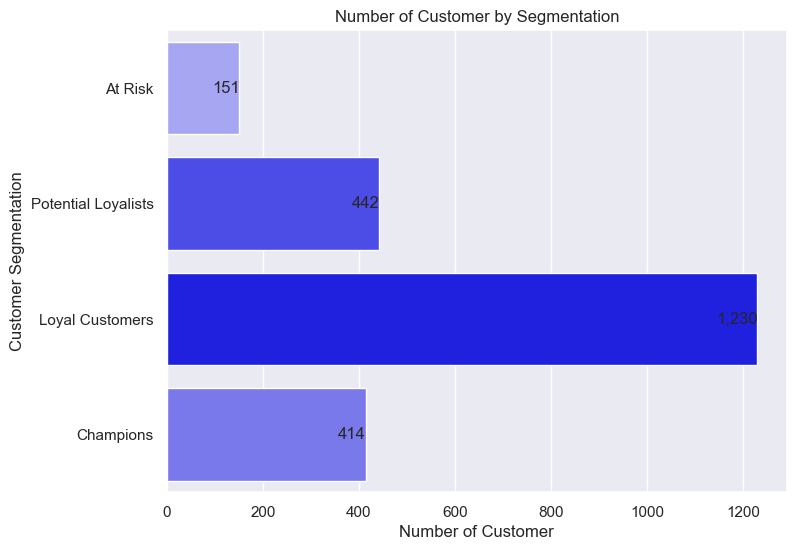

In [461]:
# membuat figura
fig, ax = plt.subplots(figsize=(8, 6))

# membuat warna
color_palette = sns.blend_palette(['blue', 'white'])

# membuat count plot
ax = sns.countplot(
    data=df,
    y='RFM_Level',
    order=['At Risk', 'Potential Loyalists', 'Loyal Customers', 'Champions'],
    palette=color_palette,
    hue='RFM_Level'
)

# mengatur judul dan label
ax.set(
    title='Number of Customer by Segmentation',
    ylabel='Customer Segmentation',
    xlabel='Number of Customer'
)

# menambahkan label
for bar in ax.patches:
    x, y = bar.get_xy()
    ax.text(
        x + bar.get_width(),
        y + bar.get_height()/2,
        f'{bar.get_width():,.0f}',
        ha='right',
        va='center'
    )

plt.show()

In [462]:
df.groupby('RFM_Level').agg(
    n_customer=('RFM_Recency', 'count'),
    median_recency=('RFM_Recency', 'median'),
    median_frequency=('RFM_Frequency', 'median'),
    median_monetary=('RFM_Monetary', 'median'),
)

n_customer  median_recency  median_frequency  \
RFM_Level                                                           
At Risk                     151            82.0               4.0   
Champions                   414            18.0              19.0   
Loyal Customers            1230            54.0              14.0   
Potential Loyalists         442            59.0               5.0   

                     median_monetary  
RFM_Level                             
At Risk                         34.0  
Champions                     1190.5  
Loyal Customers                495.0  
Potential Loyalists             52.0

Dari visualisasi dan tabel di atas kita dapat membuat summary dan rekomendasi sebagai berikut:

| Segment | Deskripsi |
| --- | --- |
|Champions |Membeli dalam 1 bulan terakhir dengan nilai transaksi dan frekuensi yang sangat tinggi (~19). |
|Loyal Customer | Membeli dalam 2 bulan terakhir dengan nilai transaksi yang cukup tinggi namun frekuensi sedang (~14).|
|Pontetial Customers |Membeli dalam 2 bulan terakhir dengan nilai transaksi yang sedang namun frekuensi rendah (~5). |
|At Risk |Membeli lebih dari 2 bulan terakhir dengan nilai transaksi yang kecil dan frekuensi sekitar 4 kali. |


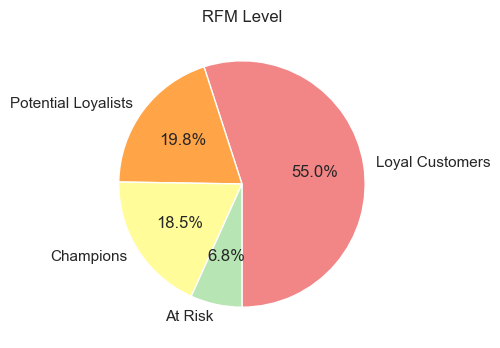

In [463]:
rfm_level = df['RFM_Level'].value_counts()

fig, ax = plt.subplots(figsize=(4,4))

ax.pie(
    rfm_level,
    labels=rfm_level.index,
    autopct='%1.1f%%',
    colors=['#F28585', '#FFA447', '#FFFC99', '#B7E5B4'],
startangle=270

)
plt.title('RFM Level')
plt.show()